<a href="https://colab.research.google.com/github/adhang/learn-data-science/blob/main/LendingClub_Loan_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LendingClub - Loan Credit Prediction

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

# Libraries

## Installing Libraries

In [1]:
# !pip install inflection
# !pip install dython
# !pip install datawig

# !pip install xgboost
# !pip install lightgbm
# !pip install catboost

# !pip install optuna
# !pip install shap

# !pip install --upgrade pandas
# !pip install --upgrade numpy
# !pip install --upgrade scipy
# !pip install --upgrade scikit-learn
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn

## Importing Libraries

In [2]:
# data manipulation
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# CamelCase to snake_case
import inflection

# missing values imputation
import datawig

# association between attributes
from dython.nominal import associations

# train test split
from sklearn.model_selection import train_test_split

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE

# model
import catboost as cb
from catboost import CatBoostClassifier

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgbm
from lightgbm import LGBMClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

# model evaluation & hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# hyperparameter tuning
import optuna

# Dataset Overview

## Reading Dataset

In [3]:
path = '/content/drive/MyDrive/My Projects/2022/Internship - id x partners/dataset/loan_data_2007_2014.csv'

data = pd.read_csv(path, dtype={'desc':str})
data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0        9.0                   f        0.0            0.0     5861.071   
1        4.0                   f        0.0            0.0     1008.710   
2       10.0                   f        0.0            0.0     3003.654   
3       37.0                   f        0.0            0.0    12226.302   
4       38.0                   f      766.9          766.9     3242.170   

   total_pymnt_

The first column (`Unnamed: 0`) is just like an index, so I'll drop it.

In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   
3          n  https://www.lendingclub.com/browse/loanDetail....   
4          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0        9.0                   f        0.0            0.0     5861.071   
1        4.0                   f        0.0            0.0     1008.710   
2       10.0                   f        0.0            0.0     3003.654   
3       37.0                   f        0.0            0.0    12226.302   
4       38.0                   f      766.9          766.9     3242.170   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.0

## Duplicated Values

In [5]:
data.duplicated().sum()

0

There's no duplicated value, good start.

## Data Types

### Numeric

In [6]:
data.select_dtypes(include=np.number).head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
0  1077501    1296599       5000         5000           4975.0     10.65   
1  1077430    1314167       2500         2500           2500.0     15.27   
2  1077175    1313524       2400         2400           2400.0     15.96   
3  1076863    1277178      10000        10000          10000.0     13.49   
4  1075358    1311748       3000         3000           3000.0     12.69   

   installment  annual_inc    dti  delinq_2yrs  inq_last_6mths  \
0       162.87     24000.0  27.65          0.0             1.0   
1        59.83     30000.0   1.00          0.0             5.0   
2        84.33     12252.0   8.72          0.0             2.0   
3       339.31     49200.0  20.00          0.0             1.0   
4        67.79     80000.0  17.94          0.0             0.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   
2                     NaN                     NaN       2.0      0.0   
3                    35.0                     NaN      10.0      0.0   
4                    38.0                     NaN      15.0      0.0   

   revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
0      13648        83.7        9.0        0.0            0.0     5861.071   
1       1687         9.4        4.0        0.0            0.0     1008.710   
2       2956        98.5       10.0        0.0            0.0     3003.654   
3       5598        21.0       37.0        0.0            0.0    12226.302   
4      27783        53.9       38.0      766.9          766.9     3242.170   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.07                0.00   
1          1008.71           456.46         435.17                0.00   
2          3003.65          2400.00         603.65                0.00   
3         12226.30         10000.00        2209.33               16.97   
4          3242.17          2233.10        1009.07                0.00   

   recoveries  collection_recovery_fee  last_pymnt_amnt  \
0        0.00                     0.00           171.62   
1      117.08                     1.11           119.66   
2        0.00                     0.00           649.91   
3        0.00                     0.00           357.48   
4        0.00                     0.00            67.79   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                         0.0                          NaN            1   
1                         0.0                          NaN            1   
2                         0.0                          NaN            1   
3                         0.0                          NaN            1   
4                         0.0                          NaN            1   

   annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  \
0               NaN        NaN                        NaN             0.0   
1               NaN        NaN                        NaN             0.0   
2               NaN        NaN                        NaN             0.0   
3               NaN        NaN                        NaN             0.0   
4               NaN        NaN                        NaN             0.0   

   tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  \
0           NaN          NaN          NaN         NaN          NaN   
1           NaN          NaN          NaN         NaN          NaN   
2           NaN          NaN          NaN         NaN          NaN   
3           NaN          NaN          NaN         NaN          NaN   
4           NaN          NaN          NaN         NaN          NaN   

   open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  \
0          NaN                 NaN         

### Categorical

In [7]:
data.select_dtypes(exclude=np.number).head()

term grade sub_grade                 emp_title emp_length  \
0   36 months     B        B2                       NaN  10+ years   
1   60 months     C        C4                     Ryder   < 1 year   
2   36 months     C        C5                       NaN  10+ years   
3   36 months     C        C1       AIR RESOURCES BOARD  10+ years   
4   60 months     B        B5  University Medical Group     1 year   

  home_ownership verification_status issue_d  loan_status pymnt_plan  \
0           RENT            Verified  Dec-11   Fully Paid          n   
1           RENT     Source Verified  Dec-11  Charged Off          n   
2           RENT        Not Verified  Dec-11   Fully Paid          n   
3           RENT     Source Verified  Dec-11   Fully Paid          n   
4           RENT     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state earliest_cr_line  \
0              Computer    860xx         AZ           Jan-85   
1                  bike    309xx         GA           Apr-99   
2  real estate business    606xx         IL           Nov-01   
3              personel    917xx         CA           Feb-96   
4              Personal    972xx         OR           Jan-96   

  initial_list_status last_pymnt_d next_pymnt_d last_credit_pull_d  \
0                   f       Jan-15          NaN             Jan-16   
1                   f       Apr-13          NaN             Sep-13   
2                   f       Jun-14          NaN             Jan-16   
3                   f       Jan-15          NaN             Jan-15   
4                   f       Jan-16       Feb-16             Jan-16   

  application_type  
0       INDIVIDUAL  
1       INDIVIDUAL  
2       INDIVIDUAL  
3       INDIVIDUAL  
4       INDIVIDUAL

In [8]:
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()
column_categorical

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

## Missing Values

In [9]:
# total null values
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage_null'})

data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T

with pd.option_context('display.precision', 0):
  display(data_null.sort_values('total_null', ascending=False).style.background_gradient())

In [10]:
data.shape

(466285, 74)

As we can see, there are some columns that have pretty much missing values. Moreover, some columns are only containing missing values.

## Dropping Column with Many Missing Values

I will drop some columns with missing values of more than 40%

In [11]:
mask = data_null['percentage_null'] > 40
column_null = data_null.loc[mask].index.tolist()

data.drop(columns=column_null, inplace=True)
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   
3          n  https://www.lendingclub.com/browse/loanDetail....   
4          n  https://www.lendingclub.com/browse/loanDetail....   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA  20.00   
4           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0          0.0           Jan-85             1.0       3.0      0.0      13648   
1          0.0           Apr-99             5.0       3.0      0.0       1687   
2          0.0           Nov-01             2.0       2.0      0.0       2956   
3          0.0           Feb-96             1.0      10.0      0.0       5598   
4          0.0           Jan-96             0.0      15.0      0.0      27783   

   revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0        83.7        9.0                   f        0.0            0.0   
1         9.4        4.0                   f        0.0            0.0   
2        98.5       10.0                   f        0.0            0.0   
3        21.0       37.0                   f        0.0            0.0   
4        53.9       38.0                   f      766.9          766.9   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0     5861.071          5831.78          5000.00         861.07   
1     1008.710          1008.71           456.46         435.17   
2     3003.654          3003.65          2400.00         603.65   
3    12226.302         12226.30         10000.00        2209.33   
4     3242.170          3242.17          2233.10        1009.07   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00       Jan-15   
1                0.00      117.08                     1.11       Apr-13   
2                0.00        0.00                     0.00       Jun-14   
3               16.97        0.00                     0.00       Jan-15   
4                0.00        0.00                     0.00       Jan-16   

   

In [12]:
# total null values
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage_null'})

data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T

mask = data_null['total_null'] != 0
with pd.option_context('display.precision', 0):
  display(data_null.loc[mask].sort_values('total_null', ascending=False).style.background_gradient())

In [13]:
data.shape

(466285, 52)

I have deleted 22 columns. Now, the highest column that has missing values is only 15%.

In [14]:
mask = data_null['total_null'] != 0
column_null = data_null[mask].index.tolist()
column_null

['emp_title',
 'emp_length',
 'annual_inc',
 'title',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

# Exploratory Data Analysis


In [15]:
good_status = ['Fully Paid', 'Current']

data_viz = data.copy()

data_viz['target'] = data_viz['loan_status'].apply(lambda x: 'Good' if x in good_status else 'Bad')

data_viz['target']

0         Good
1          Bad
2         Good
3         Good
4         Good
          ... 
466280    Good
466281     Bad
466282    Good
466283    Good
466284    Good
Name: target, Length: 466285, dtype: object

## Visualization Function

In [16]:
def stacked_bar_plot(data, x, y, orient='horizontal', ax=None, show=True):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  # create crosstab based on the input data
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')
  crosstab = crosstab.reindex(['Good', 'Bad'], axis=1)

  # visualize stacked barplot
  if orient == 'vertical':
    # order in descending (the highest value on the left)
    crosstab = crosstab.sort_values('Bad', ascending=False)
    crosstab.plot(kind='bar', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, y_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(x=i,
                  y=(y_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_yticklabels([])
  else: # default is horizontal bar plot, even if the orient input is an arbitrary value
    # orient in ascending (the highest value on the top)
    crosstab = crosstab.sort_values('Bad', ascending=True)
    crosstab.plot(kind='barh', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, x_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(y=i,
                  x=(x_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_xticklabels([])

  x_titleize = inflection.titleize(x)
  ax.set_title(f'Bad Loan Probability by {x_titleize}')      
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='', frameon=False)
  # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

## Target Distribution

<AxesSubplot:xlabel='count', ylabel='loan_status'>

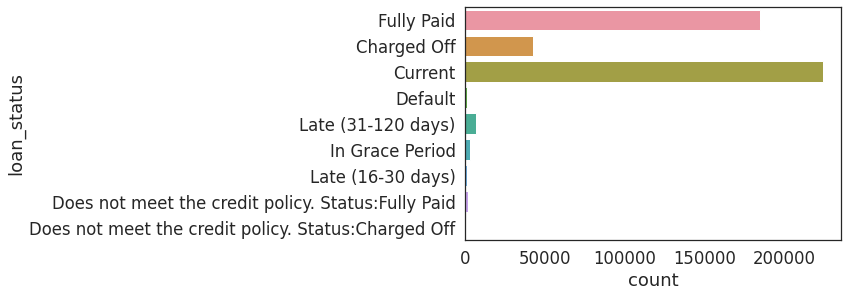

In [17]:
sns.countplot(data=data_viz, y='loan_status')

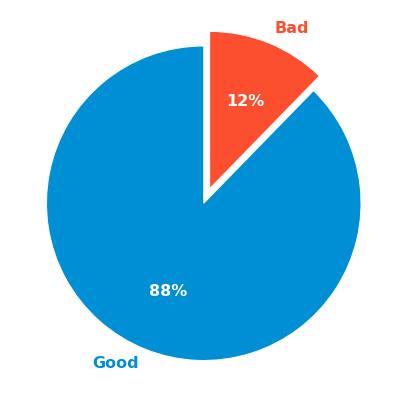

In [18]:
pie_data = data_viz['target'].value_counts(normalize=True).values * 100
pie_label = data_viz['target'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()

plt.show()

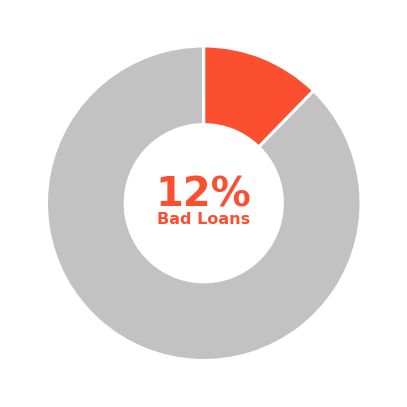

In [19]:
pie_data = data_viz['target'].value_counts(normalize=True).values * 100
pie_label = data_viz['target'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges = ax.pie(pie_data, startangle=90,
                wedgeprops={'width':0.5, 'linewidth':3},
                colors=['#C2C2C2', '#FC4F30'])

text_1 = f'{pie_data[1]:.0f}%'
text_2 = 'Bad Loans'

ax.text(0, 0.05, text_1, fontsize=40, fontweight='bold', color='#FC4F30',
        horizontalalignment='center',
        verticalalignment='center')
ax.text(0, -0.1, text_2, fontsize=16, fontweight='bold', color='#FC4F30',
        horizontalalignment='center',
        verticalalignment='center')

plt.tight_layout()

plt.show()

As we can see, 12% of borrowers have bad loan status. Technically speaking, this dataset is an imbalanced dataset.

In [20]:
data_viz['initial_list_status'].value_counts()

f    303005
w    163280
Name: initial_list_status, dtype: int64

In [21]:
a = ['total_rev_hi_lim', 'tot_coll_amt', 'tot_cur_bal']
mask = data_viz['total_rev_hi_lim'].isna()

data_viz.loc[mask]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0       1077501    1296599       5000         5000           4975.0   
1       1077430    1314167       2500         2500           2500.0   
2       1077175    1313524       2400         2400           2400.0   
3       1076863    1277178      10000        10000          10000.0   
4       1075358    1311748       3000         3000           3000.0   
...         ...        ...        ...          ...              ...   
230652  1062400    1294262      20500        20500          20500.0   
230653  1059394    1291010      15000        15000          15000.0   
230654  1059224    1290827      35000        35000          35000.0   
230655  1058722    1290521      12000        12000          12000.0   
230656  1058291    1289878      12000         7775           7775.0   

              term  int_rate  installment grade sub_grade  \
0        36 months     10.65       162.87     B        B2   
1        60 months     15.27        59.83     C        C4   
2        36 months     15.96        84.33     C        C5   
3        36 months     13.49       339.31     C        C1   
4        60 months     12.69        67.79     B        B5   
...            ...       ...          ...   ...       ...   
230652   36 months     16.77       728.54     D        D2   
230653   36 months     15.27       521.97     C        C4   
230654   36 months     15.96      1229.81     C        C5   
230655   36 months     16.29       423.61     D        D1   
230656   60 months     15.27       186.08     C        C4   

                       emp_title emp_length home_ownership  annual_inc  \
0                            NaN  10+ years           RENT     24000.0   
1                          Ryder   < 1 year           RENT     30000.0   
2                            NaN  10+ years           RENT     12252.0   
3            AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4       University Medical Group     1 year           RENT     80000.0   
...                          ...        ...            ...         ...   
230652                       NaN    7 years           RENT     60000.0   
230653                       NaN    3 years           RENT     57600.0   
230654       Tom and Holly Gores    3 years       MORTGAGE    160000.0   
230655                       NaN        NaN       MORTGAGE     35000.0   
230656                       NaN    7 years           RENT     50000.0   

       verification_status issue_d  loan_status pymnt_plan  \
0                 Verified  Dec-11   Fully Paid          n   
1          Source Verified  Dec-11  Charged Off          n   
2             Not Verified  Dec-11   Fully Paid          n   
3          Source Verified  Dec-11   Fully Paid          n   
4          Source Verified  Dec-11      Current          n   
...                    ...     ...          ...        ...   
230652     Source Verified  Jan-12   Fully Paid          n   
230653     Source Verified  Jan-12   Fully Paid          n   
230654     Source Verified  Jan-12   Fully Paid          n   
230655     Source Verified  Jan-12  Charged Off          n   
230656            Verified  Jan-12      Current          n   

                                                      url             purpose  \
0       https://www.lendingclub.com/browse/loanDetail....         credit_card   
1       https://www.lendingclub.com/browse/loanDetail....                 car   
2       https://www.lendingclub.com/browse/loanDetail....      small_business   
3       https://www.lendingclub.com/browse/loanDetail....               other   
4       https://www.lendingclub.com/browse/loanDetail....               other   
...                                                   ...                 ...   
230652  https://www.lendingclub.com/browse/loanDetail....  debt_consolidation   
230653  https://www.lendingclub.com/browse/loanDetail....      small_business   
230654  https://www.lendingclub.com/browse/loanDetail....      s

In [22]:
data_viz.loc[mask, 'initial_list_status'].value_counts()

f    70276
Name: initial_list_status, dtype: int64

# Data Preprocessing

## Column List

In [23]:
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_numerical

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [24]:
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()
column_categorical

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

## Categorical Unique Values

In [25]:
data[column_categorical].apply(lambda x: x.unique())

term                                            [ 36 months,  60 months]
grade                                              [B, C, A, E, F, D, G]
sub_grade              [B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A...
emp_title              [nan, Ryder, AIR RESOURCES BOARD, University M...
emp_length             [10+ years, < 1 year, 1 year, 3 years, 8 years...
home_ownership                   [RENT, OWN, MORTGAGE, OTHER, NONE, ANY]
verification_status            [Verified, Source Verified, Not Verified]
issue_d                [Dec-11, Nov-11, Oct-11, Sep-11, Aug-11, Jul-1...
loan_status            [Fully Paid, Charged Off, Current, Default, La...
pymnt_plan                                                        [n, y]
url                    [https://www.lendingclub.com/browse/loanDetail...
purpose                [credit_card, car, small_business, other, wedd...
title                  [Computer, bike, real estate business, persone...
zip_code               [860xx, 309xx, 606xx, 917xx,

In [26]:
data[column_categorical].nunique().sort_values()

application_type            1
initial_list_status         2
term                        2
pymnt_plan                  2
verification_status         3
home_ownership              6
grade                       7
loan_status                 9
emp_length                 11
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    91
last_pymnt_d               98
last_credit_pull_d        103
earliest_cr_line          664
zip_code                  888
title                   63099
emp_title              205475
url                    466285
dtype: int64

- The `application_type` only has a single unique value. So, I'll drop it since it will not give any information
- There are some columns that have too many categories. I will drop it since it will make the model become overfit or too sensitive to "noise"
- ~For a column that has many categories, if there are missing values in it, I will simply fill it with its most frequent value (mode)~

## Dropping Columns

### Single Variation

I will drop the `application_type` since it only has a single variation

In [27]:
data.drop(columns=['application_type'], inplace=True)

### Too Many Variation

I will drop some categorical columns that have too many categories and hard to find its pattern. From the previous section, we know that `title`, `emp_title`, and `url` have too many variation. So, I will drop it.

In [28]:
data.drop(columns=['title', 'emp_title', 'url'], inplace=True)

### Zip Code

In [29]:
data[['zip_code', 'addr_state']].sort_values('zip_code').head(10)

zip_code addr_state
29984     007xx         NJ
342425    007xx         FL
285814    007xx         PA
325695    008xx         VA
231293    010xx         MA
9236      010xx         MA
43706     010xx         MA
113322    010xx         MA
113272    010xx         MA
9270      010xx         MA

As we can see, a same zip code has different address state. So, I think zip code (in this dataset) doesn't give an exact information. So, I will drop it.

In [30]:
data.drop(columns=['zip_code'], inplace=True)

### ID Number

I think, the ID number (`id` and `member_id`) doesn't give any information about the borrowers. I will drop it.

In [31]:
data.drop(columns=['id', 'member_id'], inplace=True)

### Update Column List

In [32]:
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

data[column_categorical].nunique().sort_values()

term                     2
pymnt_plan               2
initial_list_status      2
verification_status      3
home_ownership           6
grade                    7
loan_status              9
emp_length              11
purpose                 14
sub_grade               35
addr_state              50
issue_d                 91
last_pymnt_d            98
last_credit_pull_d     103
earliest_cr_line       664
dtype: int64

As seen above, the last 4 columns that have the highest variation are date columns.

## Date Columns

I do this project on a limited time. So, this is a simple approach to handle the date columns. I will just use the 'year' instead of 'month-year' format. Fortunately, the date columns are in a fixed format (and clean!)

In [33]:
columns_date = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']

for col in columns_date:
  # split to individual columns
  tmp = data[col].str.split('-', expand=True)
  tmp = tmp.rename(columns={0:'month', 1:'year'})

  # convert the 'year' column to numeric
  tmp['year'] = pd.to_numeric(tmp['year'], errors='coerce')
  
  # assign to the original dataset
  # data[col] = tmp['year']

  print(np.sort(tmp['year'].unique()))

[ 7  8  9 10 11 12 13 14]
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan]
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 44. 46. 48. 49. 50. 51.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. 99. nan]


I have to add the year prefix (its century) to avoid misleading information.

In [34]:
columns_date = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']

for col in columns_date:
  # split to individual columns
  tmp = data[col].str.split('-', expand=True)
  tmp = tmp.rename(columns={0:'month', 1:'year'})

  # add year prefix (century), whether it's 19 or 20
  tmp['year'] = tmp['year'].apply(lambda x: np.nan if pd.isna(x) else 
                                  (f'20{x}' if int(x) <= 16 else f'19{x}'))

  # convert the 'year' column to numeric
  tmp['year'] = pd.to_numeric(tmp['year'], errors='coerce')
  
  # assign to the original dataset
  data[col] = tmp['year']

  print(np.sort(tmp['year'].unique()))

[2007 2008 2009 2010 2011 2012 2013 2014]
[2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.   nan]
[2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.   nan]
[1944. 1946. 1948. 1949. 1950. 1951. 1953. 1954. 1955. 1956. 1957. 1958.
 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970.
 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982.
 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994.
 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006.
 2007. 2008. 2009. 2010. 2011.   nan]


## Target Variable

This dataset information doesn't give an explicit information about its target variable. After reading all of the provided attribute information, I end up in a conclusion: The target variable is the loan status.

In [35]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [36]:
data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

As shown above, the loan status has many categories.
<br><br>

Based on [LendingClub](https://help.lendingclub.com/hc/en-us/articles/216109367-What-do-the-different-Note-statuses-mean-), the definition of each status is:
- `Fully Paid`: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.
- `Current`: Loan is up to date on all outstanding payments.
- `In Grace Period`: Loan is past due but within the 15-day grace period.
- `Late (16-30)`: Loan has not been current for 16 to 30 days.
- `Late (31-120)`: Loan has not been current for 31 to 120 days.
- `Default`: Loan has not been current for 121 days or more.
- `Charged Off`: Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached.
<br><br>

Based on those descriptions, I will create a new feature whether the loan status is `Good` or `Bad`. 
<br><br>

The `Good` status is when the loan status is either `Current` or `Fully Paid`, otherwise the status is `Bad`.
<br><br>

I won't include the `Does not meet the credit policy. Status:Fully Paid` as a `Good` status, because it doesn't meet the credit policy.

In [37]:
good_status = ['Fully Paid', 'Current']

data['target'] = data['loan_status'].apply(lambda x: 'Good' if x in good_status else 'Bad')

data.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
4       3000         3000           3000.0   60 months     12.69        67.79   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   
3     C        C1  10+ years           RENT     49200.0     Source Verified   
4     B        B5     1 year           RENT     80000.0     Source Verified   

   issue_d  loan_status pymnt_plan         purpose addr_state    dti  \
0     2011   Fully Paid          n     credit_card         AZ  27.65   
1     2011  Charged Off          n             car         GA   1.00   
2     2011   Fully Paid          n  small_business         IL   8.72   
3     2011   Fully Paid          n           other         CA  20.00   
4     2011      Current          n           other         OR  17.94   

   delinq_2yrs  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
0          0.0            1985.0             1.0       3.0      0.0   
1          0.0            1999.0             5.0       3.0      0.0   
2          0.0            2001.0             2.0       2.0      0.0   
3          0.0            1996.0             1.0      10.0      0.0   
4          0.0            1996.0             0.0      15.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      13648        83.7        9.0                   f        0.0   
1       1687         9.4        4.0                   f        0.0   
2       2956        98.5       10.0                   f        0.0   
3       5598        21.0       37.0                   f        0.0   
4      27783        53.9       38.0                   f      766.9   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0     5861.071          5831.78          5000.00   
1            0.0     1008.710          1008.71           456.46   
2            0.0     3003.654          3003.65          2400.00   
3            0.0    12226.302         12226.30         10000.00   
4          766.9     3242.170          3242.17          2233.10   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         603.65                0.00        0.00                     0.00   
3        2209.33               16.97        0.00                     0.00   
4        1009.07                0.00        0.00                     0.00   

   last_pymnt_d  last_pymnt_amnt  last_credit_pull_d  \
0        2015.0           171.62              2016.0   
1        2013.0           119.66              2013.0   
2        2014.0           649.91              2016.0   
3        2015.0           357.48              2015.0   
4        2016.0            67.79              2016.0   

   collections_12_mths_ex_med  policy_code  acc_now_delinq  tot_coll_amt  \
0                         0.0            1             0.0           NaN   
1                         0.0            1             0.0           NaN   
2                         0.0            1             0.0           NaN   
3                         0.0            1             0.0           NaN   
4                         0.0            1             0.0           NaN   

   tot_cur_bal  total_rev_hi_lim target  
0          NaN               NaN   Good  
1          NaN  

## Feature Associations

I will calculate the associations between each features to the target variable. Then, I will drop some features that have very small associations to the target variable.
<br><br>
I will mark the independent features that are highly correlated to each other, or we can say it as multicollinearity.

In [38]:
# update column list
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

# calculate the associations (correlation) between features
associations_out = associations(data,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['target'].drop('target').sort_values(ascending=False)

### Associations to Target

Associations can be used to describe the relationship between features.

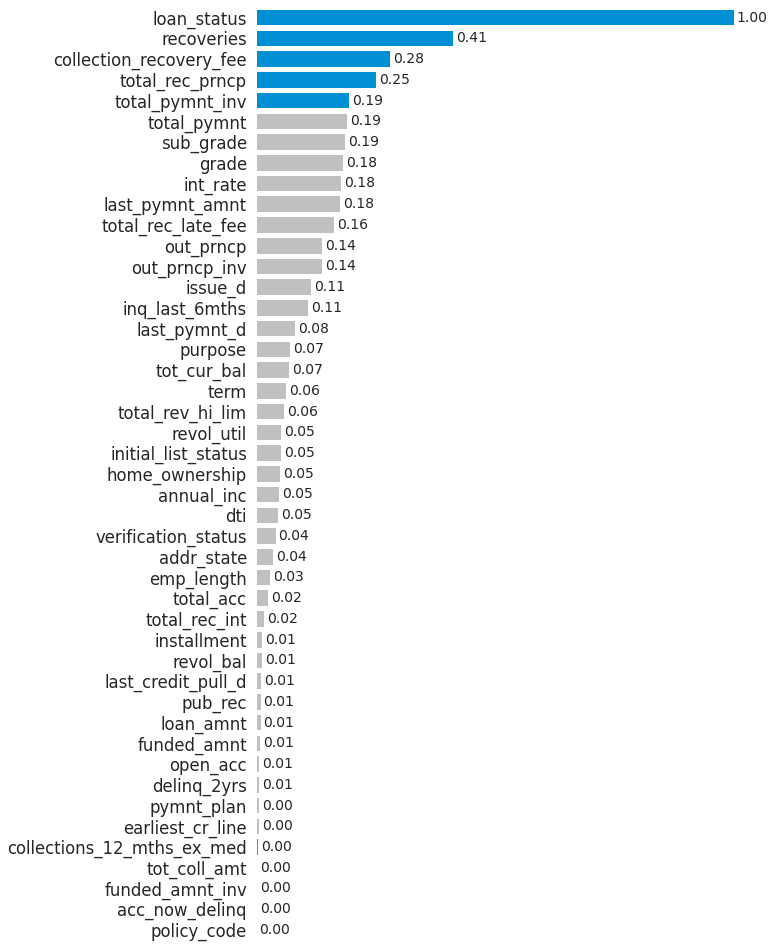

In [39]:
# custom palette top associations
threshold_top = 5
threshold_bot = corr_target.size - threshold_top - 1
palette = []
for i in range(0, len(corr_target)):
  if i < threshold_top:
    palette.append('#008FD5') # blue
  elif i > threshold_bot:
    palette.append('#FC4F30') # red
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(8,16))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax, palette=palette, saturation=1)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
# for i, label in enumerate(ax.yaxis.get_ticklabels()):
#   if (i >= threshold_top) and (i <= threshold_bot):
#     label.set_color('silver')

# custom bar label visibility
# for con in ax.containers:
#   # labels = [val for val in con.datavalues]
#   labels = con.datavalues
#   labels_len = len(labels)

#   # masking the top 3 an bottom 3
#   np.put(labels, np.arange(3,labels_len-3), [-1])
  
#   # hide the labels for non-top 3 and non-bottom 3
#   labels = [f'{val:.2f}' if val != -1 else '' for val in labels]

#   ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)

plt.show()

Surprisingly, the loan amount have a very low association with the target variable. 
<br><br>
And there are some features that have very low associations ('almost' zero) with the target variable. I will just drop it.

In [40]:
column_low_assc = ['pymnt_plan', 'collections_12_mths_ex_med',
                   'tot_coll_amt', 'acc_now_delinq', 'policy_code']

data.drop(columns=column_low_assc, inplace=True)

### Multicollinearity

In [41]:
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

# calculate the associations (correlation) between features
associations_out = associations(data,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['target'].drop('target').sort_values(ascending=False)

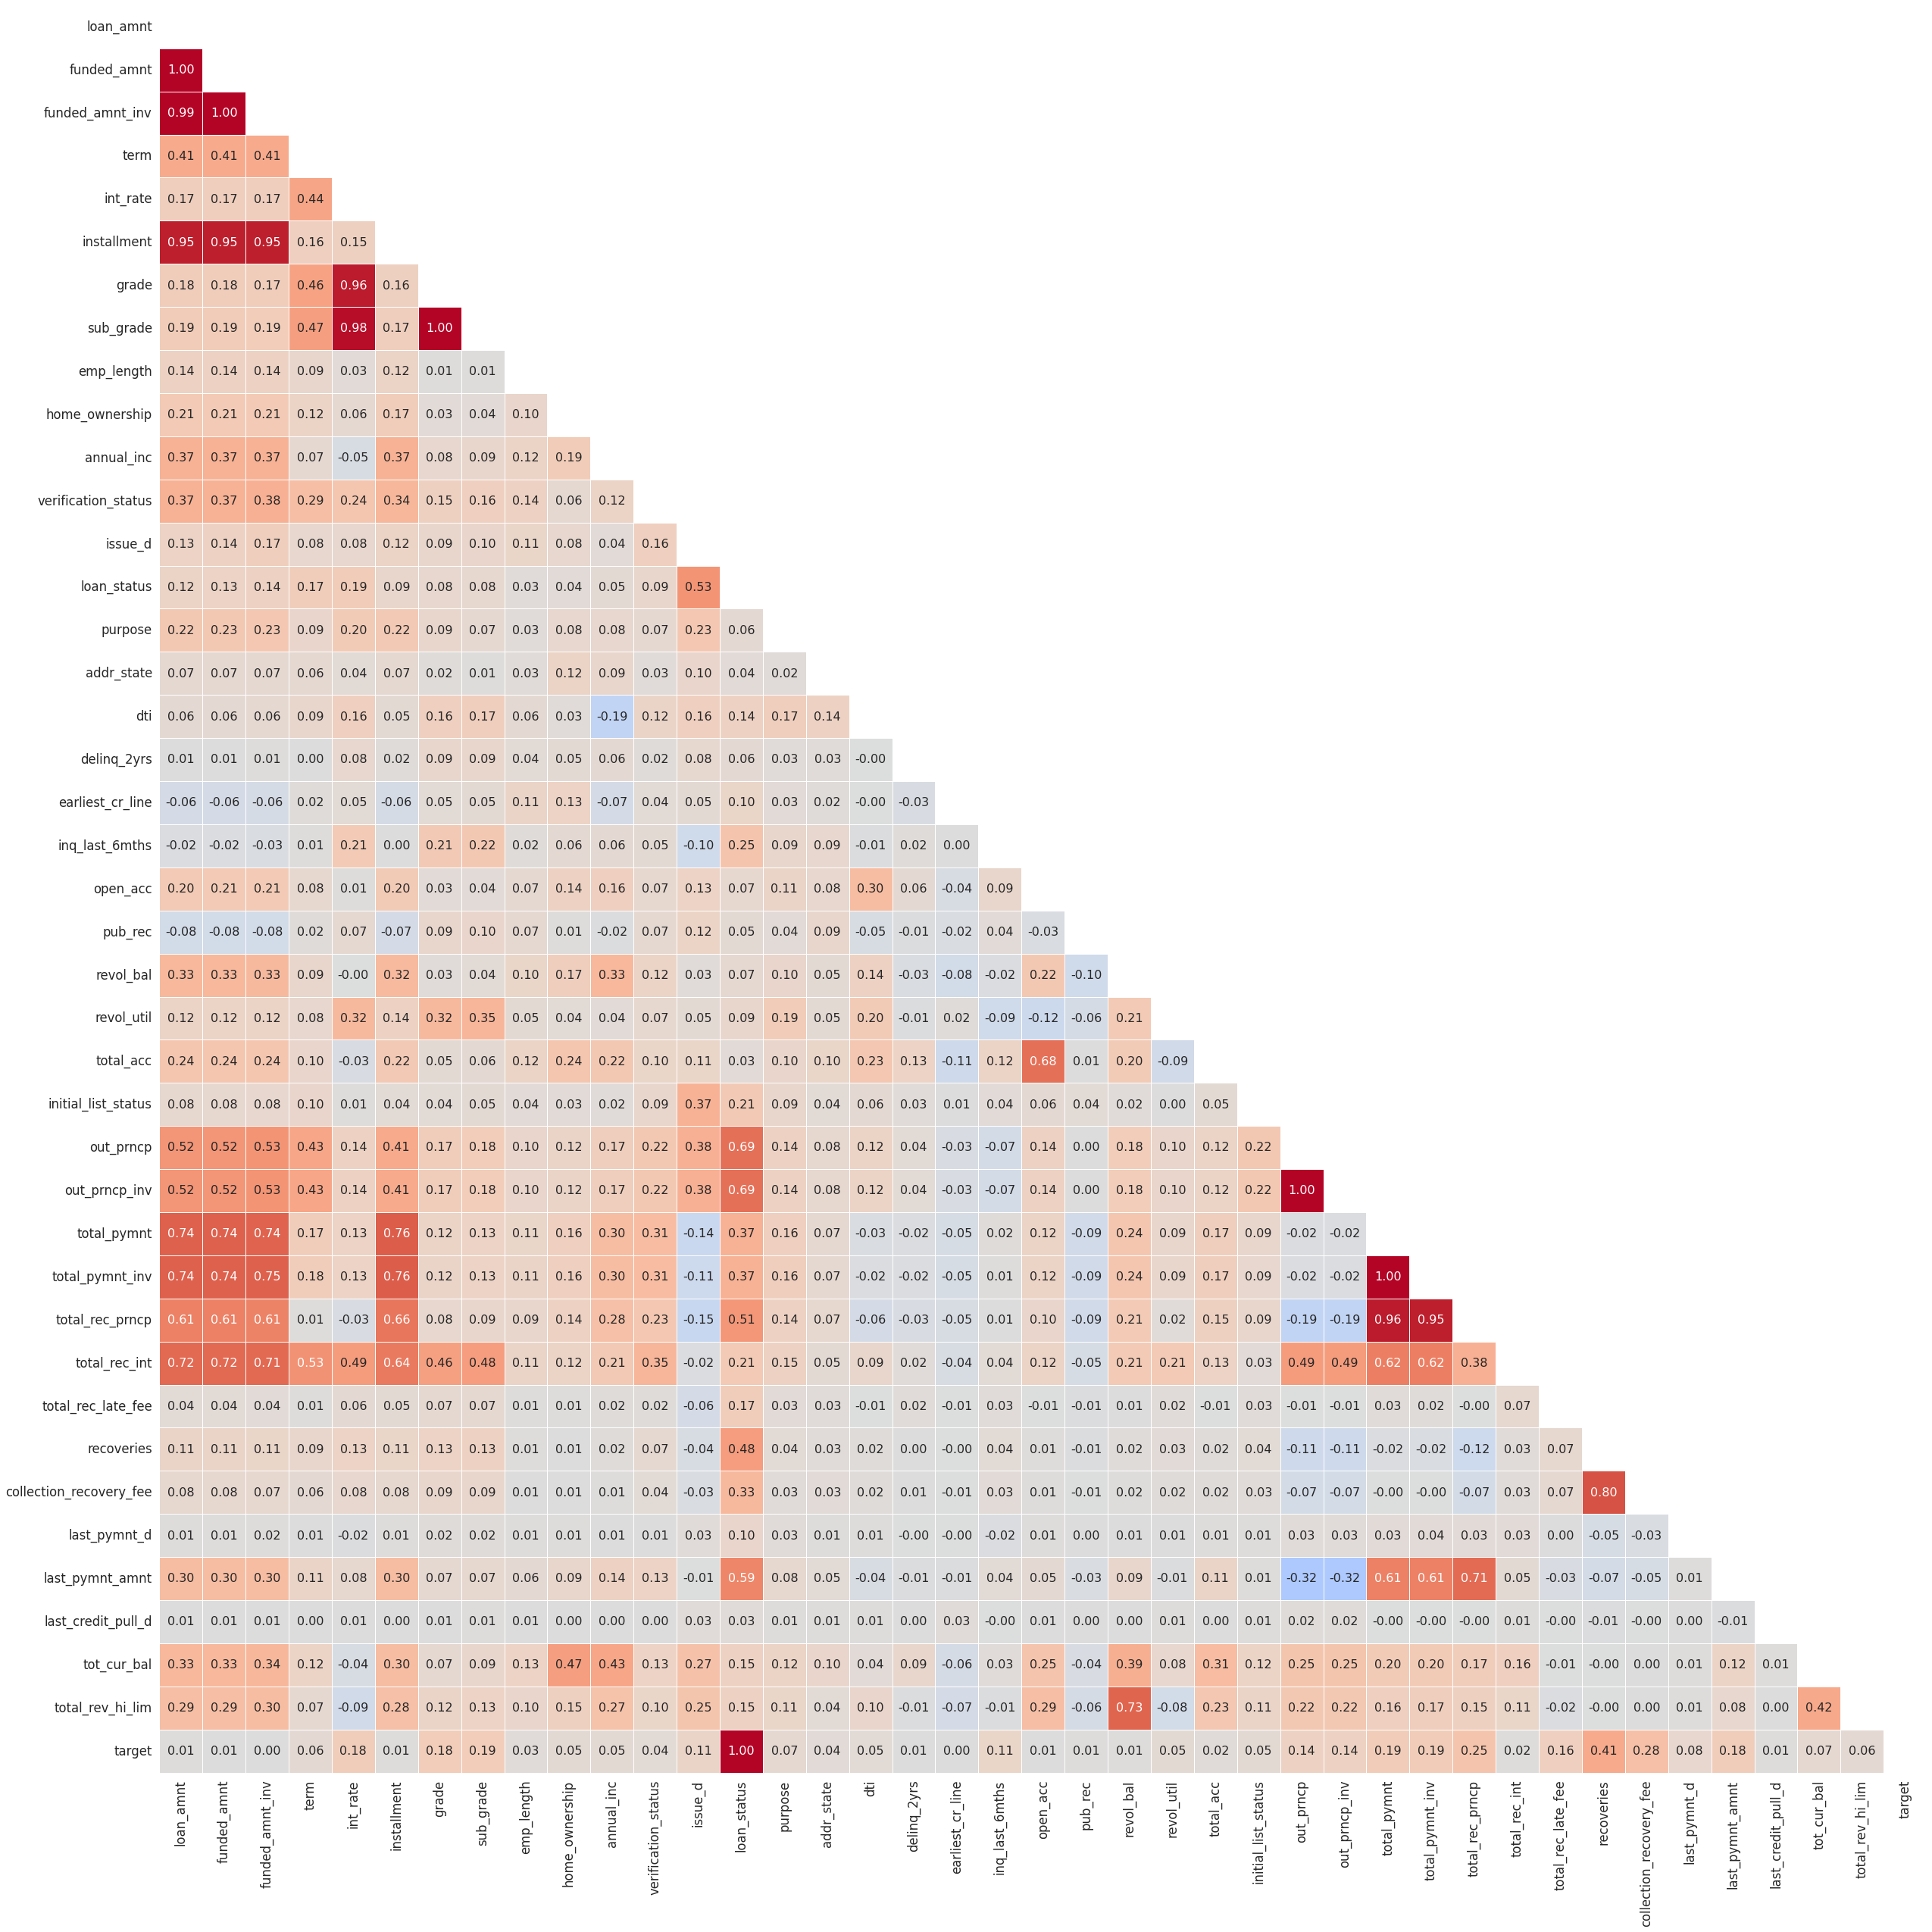

In [42]:
mask = np.triu(np.ones_like(corr_all, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_all, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask,
            square=True, annot=True, annot_kws={'fontsize':16}, fmt='.2f', ax=ax)

plt.show()

At glance, there are some multicollinearity. To check multicollinearity, we can use Variance Inflation Factor (VIF). But, I will not do it now.
<br><br>
There are two simple and commonly used ways to correct multicollinearity, as listed below:
- The first one is to remove one (or more) of the highly correlated variables. Since the information provided by the variables is redundant, the coefficient of determination will not be greatly impaired by the removal.
- The second method is to use principal components analysis (PCA) or partial least square regression (PLS) instead of OLS regression. PLS regression can reduce the variables to a smaller set with no correlation among them. In PCA, new uncorrelated variables are created. It minimizes information loss and improves the predictability of a model.
<br>

[Source](https://corporatefinanceinstitute.com/resources/knowledge/other/variance-inflation-factor-vif/)

### Handling Multicollinearity

For now, I will just drop some features (independent variables) that are highly correlated to each other. My strategy is, to find the features that have multicollinearity, then drop the features that have the lowest associations to the target variable.
<br><br>
I'm not calculating the VIF because I haven't encoded the categorical features. I will recheck the multicollinearity later.

In [43]:
column_corr = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
               'grade', 'int_rate',
               'out_prncp_inv', 
               'total_pymnt', 'total_pymnt_inv',
               'collection_recovery_fee']

data.drop(columns=column_corr, inplace=True)

In [44]:
# update column list
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

# calculate the associations (correlation) between features
associations_out = associations(data,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['target'].drop('target').sort_values(ascending=False)

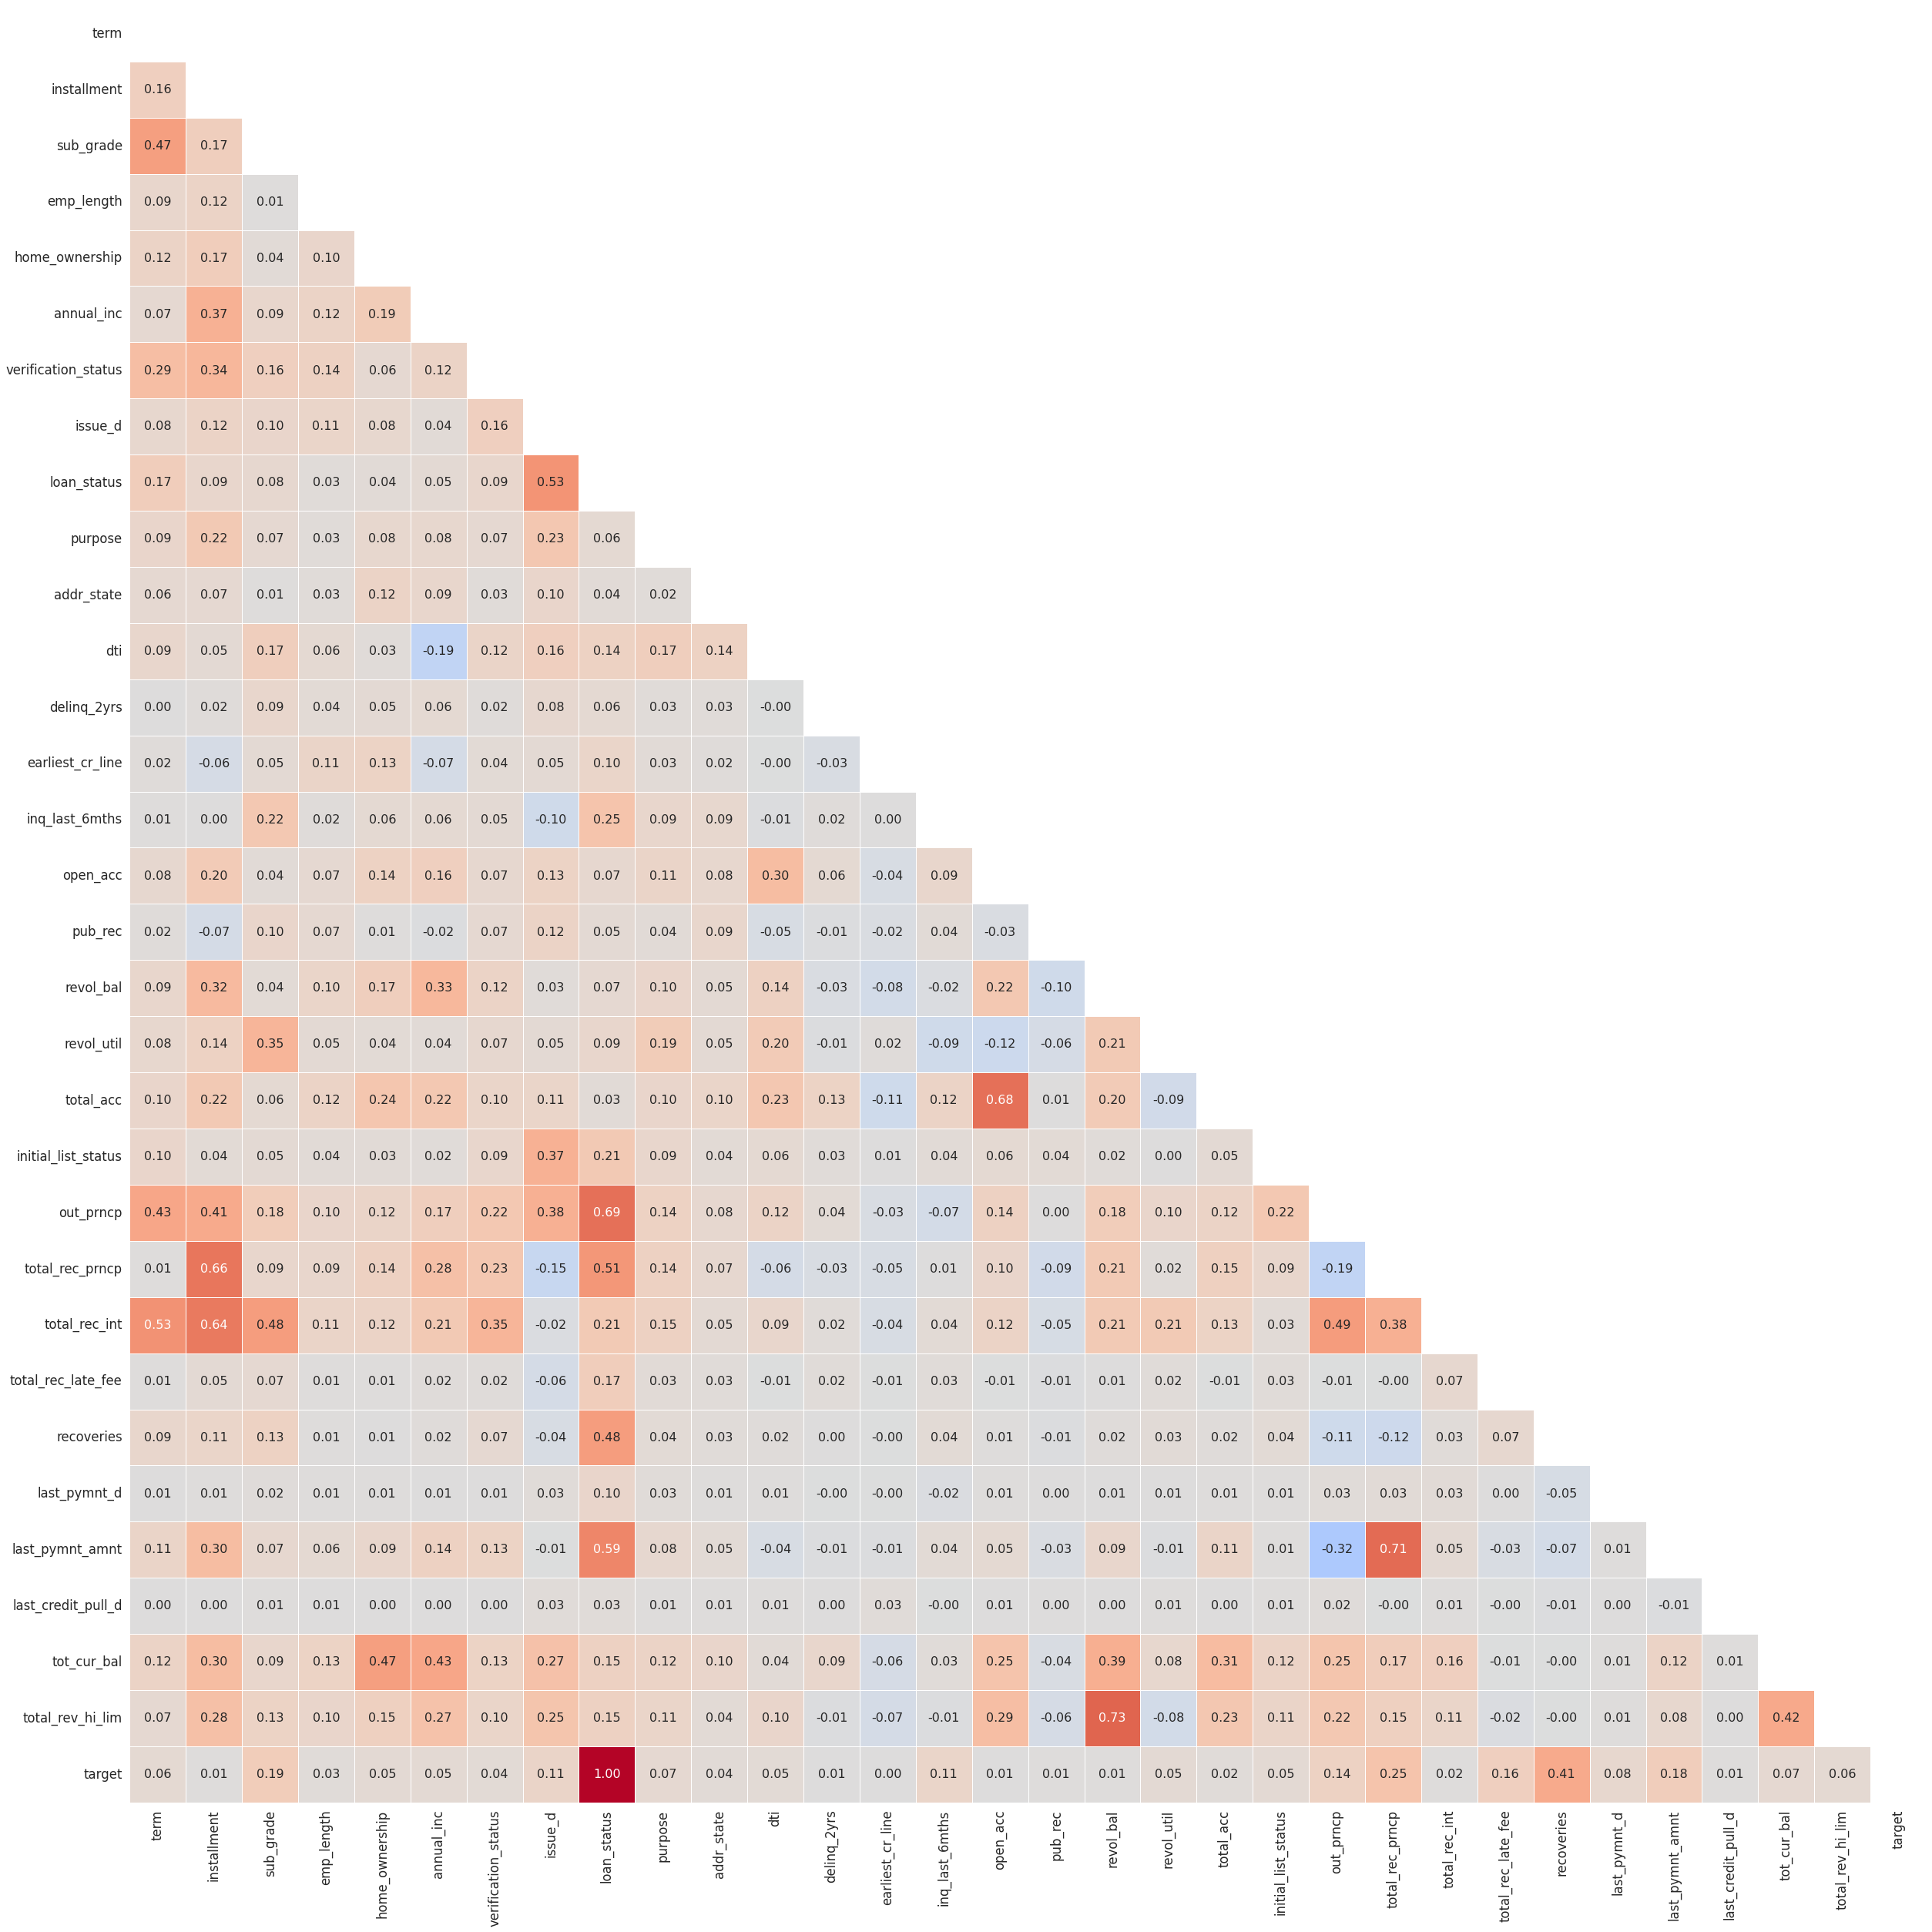

In [45]:
mask = np.triu(np.ones_like(corr_all, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_all, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask,
            square=True, annot=True, annot_kws={'fontsize':16}, fmt='.2f', ax=ax)

plt.show()

Now, the independent variables are less correlated.
<br><br>
Note: Just ignore the `loan_status` and `target`, since it has the same meaning so it must have a high association. I haven't dropped it yet.

In [46]:
data.drop(columns=['loan_status'], inplace=True)

In [47]:
# # Import library for VIF
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# def calc_vif(X):

#     # Calculating VIF
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     return(vif)

# X = df.iloc[:,:-1]
# calc_vif(X)

## Update Column List

In [48]:
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

data[column_categorical].nunique().sort_values()

term                    2
initial_list_status     2
target                  2
verification_status     3
home_ownership          6
emp_length             11
purpose                14
sub_grade              35
addr_state             50
dtype: int64

## Handling Outliers

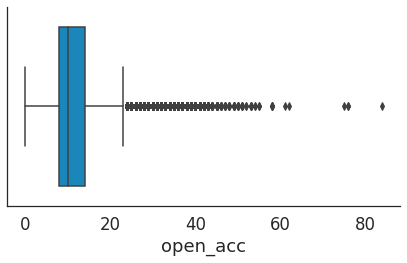

In [49]:
col = column_numerical[7]

_, ax = plt.subplots(figsize=(6,4))

sns.boxplot(data=data, x=col, ax=ax)

sns.despine()
plt.tight_layout()
plt.show()

## Update Missing Values Table

In [50]:
# total null values
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage_null'})

data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T

mask = data_null['total_null'] != 0
with pd.option_context('display.precision', 0):
  display(data_null.loc[mask].sort_values('total_null', ascending=False).style.background_gradient())

In [51]:
mask = data_null['total_null'] != 0
column_null = data_null[mask].index.tolist()
column_null

['emp_length',
 'annual_inc',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'last_pymnt_d',
 'last_credit_pull_d',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [52]:
len(column_null)

13

Now, we only have 13 columns that have missing values

## Train - Test Split

I use a 70% : 30% ratio for the training set and testing set respectively.

In [53]:
data_X = data.drop(columns=['target'])
data_y = data['target']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3,
                                                    random_state=1, stratify=data_y)

I do train-test split first to prevent data leakage when doing the data preprocessing steps

In [54]:
column_numerical = data_X.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data_X.select_dtypes(exclude=np.number).columns.values.tolist()

## Missing Values Imputation

The best approach to do imputation is using domain knowledge, asking an expert, or looking for its pattern. However, I don't have any experience in the finance domain. Therefore, I will use a simple imputation (univariate feature imputation) strategy:
- Mean or median for numerical features
- Mode (most frequent) for categorical features
<br><br>

Actually, there is another method for imputing missing values: multivariate feature imputation, such as KNN imputer, iterative imputer (MICE), and DataWig (from AWS Labs). I think, those methods have a better performance than a simple imputer. However, it will take a long time to train the imputer, since this dataset is the largest dataset I've ever seen.
<br><br>
If I have more time, maybe I will try the other imputation methods.

mean	: 17.218757927018626
median	: 16.87
mode	: 14.4


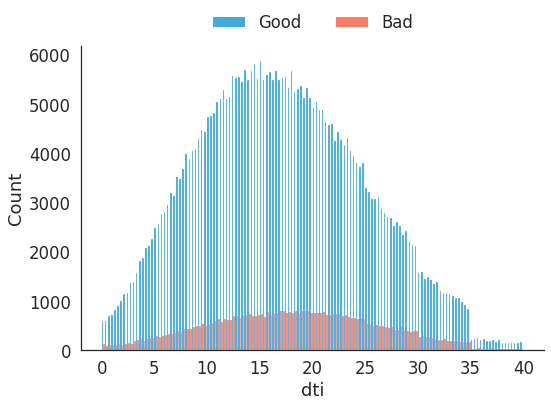

In [55]:
col = column_numerical[3]
print('mean\t:', data[col].mean())
print('median\t:', data[col].median())
print('mode\t:', data[col].mode()[0])

_, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=data, x=col, hue='target', multiple='dodge', ax=ax)
sns.move_legend(ax, 'lower center', bbox_to_anchor=(.5, 1), title='', ncol=2, frameon=False)

sns.despine()

plt.tight_layout()
plt.show()

I use median for imputing the numerical features because it's less sensitive to outliers.

In [56]:
for col in column_null:
  if col in column_categorical:
    most_frequent = X_train[col].mode()[0]
    X_train[col].fillna(most_frequent, inplace=True)
    X_test[col].fillna(most_frequent, inplace=True)
    # print(col, most_frequent)
  else:
    median = X_train[col].median()
    X_train[col].fillna(median, inplace=True)
    X_test[col].fillna(median, inplace=True)
    # print(col, median)

## Label Encoding

In [57]:
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)

In [58]:
le.classes_

array(['Bad', 'Good'], dtype=object)

`Bad` is in the first index, so it means that `Bad = 0` and `Good = 1`.

In [59]:
print(y_train[:5].values)
print(y_train_encode[:5])

['Good' 'Good' 'Good' 'Good' 'Bad']
[1 1 1 1 0]


## One Hot Encoding

In [60]:
# drop 1 category if the feature only has 2 categories
ohe = OneHotEncoder(sparse=False, drop='if_binary')

ohe.fit(X_train[column_categorical])

X_train_ohe = ohe.transform(X_train[column_categorical])
X_test_ohe = ohe.transform(X_test[column_categorical])

## Encoded Dataframe

I will combine the encoded features and the numerical features. Make sure that the index is the same.

In [61]:
column_ohe = ohe.get_feature_names_out()
column_ohe

array(['term_ 60 months', 'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1',
       'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'emp_length_1 year', 'emp_length_10+ years', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years',
       'emp_length_9 years', 'emp_length_< 1 year', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       

I will rename the column name to `snake_case` format.

In [62]:
for i, col in enumerate(column_ohe):
  column_ohe[i] = inflection.underscore(column_ohe[i])
  column_ohe[i] = column_ohe[i].replace(' ', '_')
  column_ohe[i] = column_ohe[i].replace('<', 'less_than')
  column_ohe[i] = column_ohe[i].replace('>', 'greater_than')

column_ohe

array(['term__60_months', 'sub_grade_a1', 'sub_grade_a2', 'sub_grade_a3',
       'sub_grade_a4', 'sub_grade_a5', 'sub_grade_b1', 'sub_grade_b2',
       'sub_grade_b3', 'sub_grade_b4', 'sub_grade_b5', 'sub_grade_c1',
       'sub_grade_c2', 'sub_grade_c3', 'sub_grade_c4', 'sub_grade_c5',
       'sub_grade_d1', 'sub_grade_d2', 'sub_grade_d3', 'sub_grade_d4',
       'sub_grade_d5', 'sub_grade_e1', 'sub_grade_e2', 'sub_grade_e3',
       'sub_grade_e4', 'sub_grade_e5', 'sub_grade_f1', 'sub_grade_f2',
       'sub_grade_f3', 'sub_grade_f4', 'sub_grade_f5', 'sub_grade_g1',
       'sub_grade_g2', 'sub_grade_g3', 'sub_grade_g4', 'sub_grade_g5',
       'emp_length_1_year', 'emp_length_10+_years', 'emp_length_2_years',
       'emp_length_3_years', 'emp_length_4_years', 'emp_length_5_years',
       'emp_length_6_years', 'emp_length_7_years', 'emp_length_8_years',
       'emp_length_9_years', 'emp_length_less_than_1_year',
       'home_ownership_any', 'home_ownership_mortgage',
       'home_ownership

### Train Set

In [63]:
# create dataframe from one-hot encoded features
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)

# combine the numerical and encoded features
X_train_encode = pd.concat([X_train.drop(columns=column_categorical), X_train_ohe_df], axis=1)
X_train_encode.head()

installment  annual_inc  issue_d    dti  delinq_2yrs  \
42880        135.80     45000.0     2013  22.85          0.0   
220612       353.01     40000.0     2012  19.05          0.0   
38117        515.74    244000.0     2008  20.01          0.0   
303581       235.83     65000.0     2014  22.05          0.0   
80739        972.97    132000.0     2013   8.21          0.0   

        earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
42880             2001.0             1.0      15.0      0.0      14627   
220612            2006.0             3.0       5.0      0.0       7343   
38117             1988.0             1.0      24.0      0.0      77179   
303581            2006.0             1.0      11.0      0.0       5644   
80739             2008.0             1.0       6.0      0.0      14354   

        revol_util  total_acc  out_prncp  total_rec_prncp  total_rec_int  \
42880         54.2       26.0        0.0          4000.00         293.61   
220612        85.4        6.0        0.0         10000.00        2704.72   
38117         82.5       41.0        0.0         15000.00        3562.22   
303581        60.0       19.0        0.0          7000.00         906.10   
80739         99.7       11.0        0.0          9674.45        6864.96   

        total_rec_late_fee  recoveries  last_pymnt_d  last_pymnt_amnt  \
42880                  0.0        0.00        2014.0          3479.43   
220612                 0.0        0.00        2015.0           361.03   
38117                  0.0        0.00        2011.0           535.09   
303581                 0.0        0.00        2015.0          4840.31   
80739                  0.0     2851.51        2015.0           972.97   

        last_credit_pull_d  tot_cur_bal  total_rev_hi_lim  term__60_months  \
42880               2016.0      22864.0           27000.0              0.0   
220612              2016.0      81533.5           22800.0              0.0   
38117               2011.0      81533.5           22800.0              0.0   
303581              2016.0     165335.0            9400.0              0.0   
80739               2015.0      31088.0           14400.0              0.0   

        sub_grade_a1  sub_grade_a2  sub_grade_a3  sub_grade_a4  sub_grade_a5  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_b1  sub_grade_b2  sub_grade_b3  sub_grade_b4  sub_grade_b5  \
42880            0.0           0.0           0.0           0.0           1.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_c1  sub_grade_c2  sub_grade_c3  sub_grade_c4  sub_grade_c5  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           1.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           1.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_d1  sub_grade_d2  sub_grade_d3  sub_grade_d4  sub_grade_d5  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           1.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0  

### Test Set

In [64]:
# create dataframe from one-hot encoded features
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)

# combine the numerical and encoded features
X_test_encode = pd.concat([X_test.drop(columns=column_categorical), X_test_ohe_df], axis=1)
X_test_encode.head()

installment  annual_inc  issue_d    dti  delinq_2yrs  \
221094       326.16     55798.0     2012  16.15          0.0   
337901       330.57     80000.0     2014   8.21          1.0   
195442       337.47     60000.0     2012   8.80          0.0   
41374        319.47     60000.0     2008  19.58          0.0   
231555       469.16     52000.0     2014  19.20          0.0   

        earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
221094            2000.0             0.0       9.0      0.0       6859   
337901            2002.0             2.0       9.0      1.0       2784   
195442            2007.0             0.0      15.0      0.0       8586   
41374             1978.0             0.0       8.0      0.0     164974   
231555            1995.0             0.0      10.0      0.0      30735   

        revol_util  total_acc  out_prncp  total_rec_prncp  total_rec_int  \
221094        79.8       21.0       0.00         10000.00         928.23   
337901        14.7       16.0    5709.44          4290.56        1329.13   
195442        48.2       16.0       0.00         10000.00        2037.57   
41374         24.6       17.0       0.00          9999.99        1409.66   
231555        67.1       23.0   16860.33          2864.67        2748.82   

        total_rec_late_fee  recoveries  last_pymnt_d  last_pymnt_amnt  \
221094                 0.0         0.0        2013.0          7348.66   
337901                 0.0         0.0        2015.0           330.57   
195442                 0.0         0.0        2015.0          2930.04   
41374                  0.0         0.0        2011.0          2813.67   
231555                 0.0         0.0        2015.0           469.16   

        last_credit_pull_d  tot_cur_bal  total_rev_hi_lim  term__60_months  \
221094              2015.0      81533.5           22800.0              0.0   
337901              2016.0      18089.0           18900.0              0.0   
195442              2015.0     177669.0           17800.0              0.0   
41374               2011.0      81533.5           22800.0              0.0   
231555              2016.0     162710.0           45800.0              1.0   

        sub_grade_a1  sub_grade_a2  sub_grade_a3  sub_grade_a4  sub_grade_a5  \
221094           0.0           0.0           0.0           0.0           0.0   
337901           0.0           0.0           0.0           0.0           0.0   
195442           0.0           0.0           0.0           0.0           0.0   
41374            0.0           0.0           0.0           1.0           0.0   
231555           0.0           0.0           0.0           0.0           0.0   

        sub_grade_b1  sub_grade_b2  sub_grade_b3  sub_grade_b4  sub_grade_b5  \
221094           0.0           1.0           0.0           0.0           0.0   
337901           0.0           0.0           0.0           1.0           0.0   
195442           0.0           0.0           0.0           1.0           0.0   
41374            0.0           0.0           0.0           0.0           0.0   
231555           0.0           0.0           0.0           0.0           0.0   

        sub_grade_c1  sub_grade_c2  sub_grade_c3  sub_grade_c4  sub_grade_c5  \
221094           0.0           0.0           0.0           0.0           0.0   
337901           0.0           0.0           0.0           0.0           0.0   
195442           0.0           0.0           0.0           0.0           0.0   
41374            0.0           0.0           0.0           0.0           0.0   
231555           0.0           0.0           0.0           0.0           1.0   

        sub_grade_d1  sub_grade_d2  sub_grade_d3  sub_grade_d4  sub_grade_d5  \
221094           0.0           0.0           0.0           0.0           0.0   
337901           0.0           0.0           0.0           0.0           0.0   
195442           0.0           0.0           0.0           0.0           0.0   
41374            0.0           0.0           0.0  

### Full Dataset

In [65]:
# combine the X-train and X-test
data_encode = pd.concat([X_train_encode, X_test_encode], axis=0)

# combine with the y-train
data_encode = data_encode.join(pd.Series(y_train_encode, name='target', index=X_train_encode.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_encode = data_encode.join(pd.Series(y_test_encode, name='target', index=X_test_encode.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_encode['target_1'].fillna(data_encode['target_2'], inplace=True)
data_encode.drop(columns='target_2', inplace=True)
data_encode.rename(columns={'target_1':'target'}, inplace=True)

data_encode.head()

installment  annual_inc  issue_d    dti  delinq_2yrs  \
42880        135.80     45000.0     2013  22.85          0.0   
220612       353.01     40000.0     2012  19.05          0.0   
38117        515.74    244000.0     2008  20.01          0.0   
303581       235.83     65000.0     2014  22.05          0.0   
80739        972.97    132000.0     2013   8.21          0.0   

        earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
42880             2001.0             1.0      15.0      0.0      14627   
220612            2006.0             3.0       5.0      0.0       7343   
38117             1988.0             1.0      24.0      0.0      77179   
303581            2006.0             1.0      11.0      0.0       5644   
80739             2008.0             1.0       6.0      0.0      14354   

        revol_util  total_acc  out_prncp  total_rec_prncp  total_rec_int  \
42880         54.2       26.0        0.0          4000.00         293.61   
220612        85.4        6.0        0.0         10000.00        2704.72   
38117         82.5       41.0        0.0         15000.00        3562.22   
303581        60.0       19.0        0.0          7000.00         906.10   
80739         99.7       11.0        0.0          9674.45        6864.96   

        total_rec_late_fee  recoveries  last_pymnt_d  last_pymnt_amnt  \
42880                  0.0        0.00        2014.0          3479.43   
220612                 0.0        0.00        2015.0           361.03   
38117                  0.0        0.00        2011.0           535.09   
303581                 0.0        0.00        2015.0          4840.31   
80739                  0.0     2851.51        2015.0           972.97   

        last_credit_pull_d  tot_cur_bal  total_rev_hi_lim  term__60_months  \
42880               2016.0      22864.0           27000.0              0.0   
220612              2016.0      81533.5           22800.0              0.0   
38117               2011.0      81533.5           22800.0              0.0   
303581              2016.0     165335.0            9400.0              0.0   
80739               2015.0      31088.0           14400.0              0.0   

        sub_grade_a1  sub_grade_a2  sub_grade_a3  sub_grade_a4  sub_grade_a5  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_b1  sub_grade_b2  sub_grade_b3  sub_grade_b4  sub_grade_b5  \
42880            0.0           0.0           0.0           0.0           1.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_c1  sub_grade_c2  sub_grade_c3  sub_grade_c4  sub_grade_c5  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           1.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           1.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_d1  sub_grade_d2  sub_grade_d3  sub_grade_d4  sub_grade_d5  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           1.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0  

## Feature Skewness


In [66]:
data[column_numerical].skew()

installment             0.949
annual_inc             29.569
issue_d                -1.798
dti                     0.188
delinq_2yrs             5.346
earliest_cr_line       -1.068
inq_last_6mths          2.142
open_acc                1.166
pub_rec                14.941
revol_bal              19.476
revol_util             -0.161
total_acc               0.813
out_prncp               1.590
total_rec_prncp         1.446
total_rec_int           2.268
total_rec_late_fee     13.843
recoveries             13.150
last_pymnt_d           -1.667
last_pymnt_amnt         2.561
last_credit_pull_d     -2.689
tot_cur_bal             3.048
total_rev_hi_lim      100.586
dtype: float64

In [67]:
len(column_numerical)

22

mean	: 17.218757927018626
median	: 16.87
mode	: 14.4


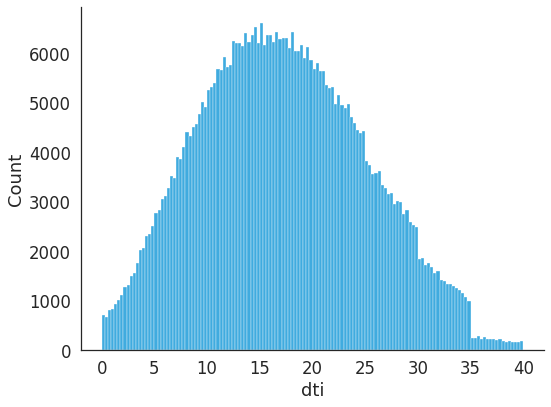

In [68]:
col = column_numerical[3]
print('mean\t:', data[col].mean())
print('median\t:', data[col].median())
print('mode\t:', data[col].mode()[0])

_, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=data, x=col, ax=ax)

sns.despine()

plt.tight_layout()
plt.show()

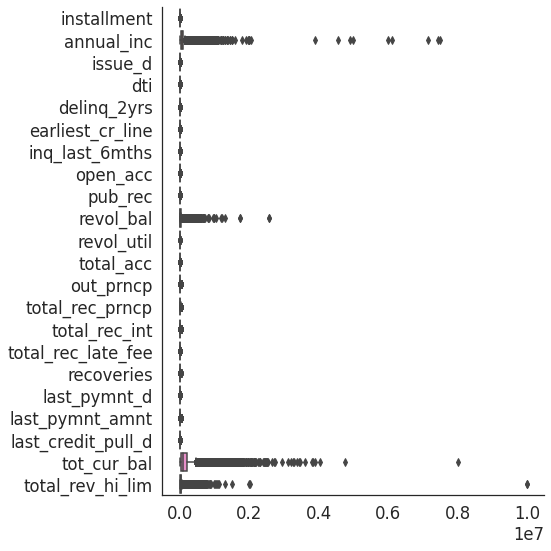

In [69]:
_, ax = plt.subplots(figsize=(8,8))

sns.boxplot(data=data[column_numerical], orient='h', ax=ax)

sns.despine()
plt.tight_layout()
plt.show()

## Feature Scaling

In [70]:
X_train_scale = X_train_encode.copy()
X_test_scale = X_test_encode.copy()

for i in column_numerical:
  scaler = StandardScaler()
  scaler.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler.transform(X_test_scale[[i]])

28.02


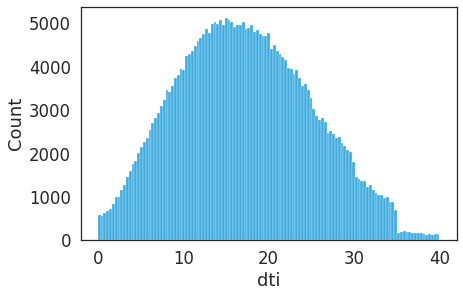

In [71]:
col = column_numerical[3]

# X_train[col].value_counts()

print(np.percentile(X_train[col], 90))
sns.histplot(X_train[col])

plt.show()

In [72]:
X_train.isna().sum()

term                   0
installment            0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
initial_list_status    0
out_prncp              0
total_rec_prncp        0
total_rec_int          0
total_rec_late_fee     0
recoveries             0
last_pymnt_d           0
last_pymnt_amnt        0
last_credit_pull_d     0
tot_cur_bal            0
total_rev_hi_lim       0
dtype: int64

<AxesSubplot:xlabel='dti', ylabel='Count'>

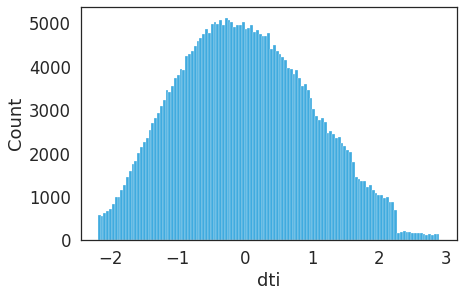

In [73]:
col = column_numerical[3]

sns.histplot(X_train_scale[col])

## Scaled Dataframe

This dataframe has been encoded and scaled

In [74]:
# combine the X-train and X-test
data_scale = pd.concat([X_train_scale, X_test_scale], axis=0)

# combine with the y-train
data_scale = data_scale.join(pd.Series(y_train_encode, name='target', index=X_train_scale.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_scale = data_scale.join(pd.Series(y_test_encode, name='target', index=X_test_scale.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_scale['target_1'].fillna(data_scale['target_2'], inplace=True)
data_scale.drop(columns='target_2', inplace=True)
data_scale.rename(columns={'target_1':'target'}, inplace=True)

data_scale.head()

installment  annual_inc  issue_d    dti  delinq_2yrs  \
42880        -1.218      -0.492   -0.117  0.716       -0.358   
220612       -0.325      -0.579   -0.967  0.232       -0.358   
38117         0.344       2.959   -4.366  0.355       -0.358   
303581       -0.807      -0.145    0.733  0.614       -0.358   
80739         2.225       1.017   -0.117 -1.148       -0.358   

        earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
42880              0.520           0.179     0.766   -0.318     -0.076   
220612             1.211           2.011    -1.242   -0.318     -0.420   
38117             -1.276           0.179     2.574   -0.318      2.881   
303581             1.211           0.179    -0.037   -0.318     -0.501   
80739              1.487           0.179    -1.041   -0.318     -0.089   

        revol_util  total_acc  out_prncp  total_rec_prncp  total_rec_int  \
42880       -0.083      0.082     -0.695           -0.693         -0.924   
220612       1.231     -1.645     -0.695            0.161          0.047   
38117        1.109      1.378     -0.695            0.873          0.392   
303581       0.161     -0.522     -0.695           -0.266         -0.678   
80739        1.834     -1.213     -0.695            0.115          1.723   

        total_rec_late_fee  recoveries  last_pymnt_d  last_pymnt_amnt  \
42880               -0.122      -0.154        -0.805            0.064   
220612              -0.122      -0.154         0.035           -0.497   
38117               -0.122      -0.154        -3.324           -0.466   
303581              -0.122      -0.154         0.035            0.309   
80739               -0.122       4.979         0.035           -0.387   

        last_credit_pull_d  tot_cur_bal  total_rev_hi_lim  term__60_months  \
42880                0.514       -0.754            -0.061              0.0   
220612               0.514       -0.343            -0.174              0.0   
38117               -4.691       -0.343            -0.174              0.0   
303581               0.514        0.245            -0.535              0.0   
80739               -0.527       -0.697            -0.400              0.0   

        sub_grade_a1  sub_grade_a2  sub_grade_a3  sub_grade_a4  sub_grade_a5  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_b1  sub_grade_b2  sub_grade_b3  sub_grade_b4  sub_grade_b5  \
42880            0.0           0.0           0.0           0.0           1.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_c1  sub_grade_c2  sub_grade_c3  sub_grade_c4  sub_grade_c5  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           1.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           1.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_d1  sub_grade_d2  sub_grade_d3  sub_grade_d4  sub_grade_d5  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           1.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0  

In [75]:
data_scale_train = pd.concat([X_train_scale, pd.Series(y_train_encode, name='target', index=X_train_scale.index)], axis=1)
data_scale_train.head()

installment  annual_inc  issue_d    dti  delinq_2yrs  \
42880        -1.218      -0.492   -0.117  0.716       -0.358   
220612       -0.325      -0.579   -0.967  0.232       -0.358   
38117         0.344       2.959   -4.366  0.355       -0.358   
303581       -0.807      -0.145    0.733  0.614       -0.358   
80739         2.225       1.017   -0.117 -1.148       -0.358   

        earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
42880              0.520           0.179     0.766   -0.318     -0.076   
220612             1.211           2.011    -1.242   -0.318     -0.420   
38117             -1.276           0.179     2.574   -0.318      2.881   
303581             1.211           0.179    -0.037   -0.318     -0.501   
80739              1.487           0.179    -1.041   -0.318     -0.089   

        revol_util  total_acc  out_prncp  total_rec_prncp  total_rec_int  \
42880       -0.083      0.082     -0.695           -0.693         -0.924   
220612       1.231     -1.645     -0.695            0.161          0.047   
38117        1.109      1.378     -0.695            0.873          0.392   
303581       0.161     -0.522     -0.695           -0.266         -0.678   
80739        1.834     -1.213     -0.695            0.115          1.723   

        total_rec_late_fee  recoveries  last_pymnt_d  last_pymnt_amnt  \
42880               -0.122      -0.154        -0.805            0.064   
220612              -0.122      -0.154         0.035           -0.497   
38117               -0.122      -0.154        -3.324           -0.466   
303581              -0.122      -0.154         0.035            0.309   
80739               -0.122       4.979         0.035           -0.387   

        last_credit_pull_d  tot_cur_bal  total_rev_hi_lim  term__60_months  \
42880                0.514       -0.754            -0.061              0.0   
220612               0.514       -0.343            -0.174              0.0   
38117               -4.691       -0.343            -0.174              0.0   
303581               0.514        0.245            -0.535              0.0   
80739               -0.527       -0.697            -0.400              0.0   

        sub_grade_a1  sub_grade_a2  sub_grade_a3  sub_grade_a4  sub_grade_a5  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_b1  sub_grade_b2  sub_grade_b3  sub_grade_b4  sub_grade_b5  \
42880            0.0           0.0           0.0           0.0           1.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_c1  sub_grade_c2  sub_grade_c3  sub_grade_c4  sub_grade_c5  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           1.0   
38117            0.0           0.0           0.0           0.0           0.0   
303581           1.0           0.0           0.0           0.0           0.0   
80739            0.0           0.0           0.0           0.0           0.0   

        sub_grade_d1  sub_grade_d2  sub_grade_d3  sub_grade_d4  sub_grade_d5  \
42880            0.0           0.0           0.0           0.0           0.0   
220612           0.0           0.0           0.0           0.0           0.0   
38117            0.0           1.0           0.0           0.0           0.0   
303581           0.0           0.0           0.0  

## Correlation

In [76]:
corr_matrix = data_scale.corr()

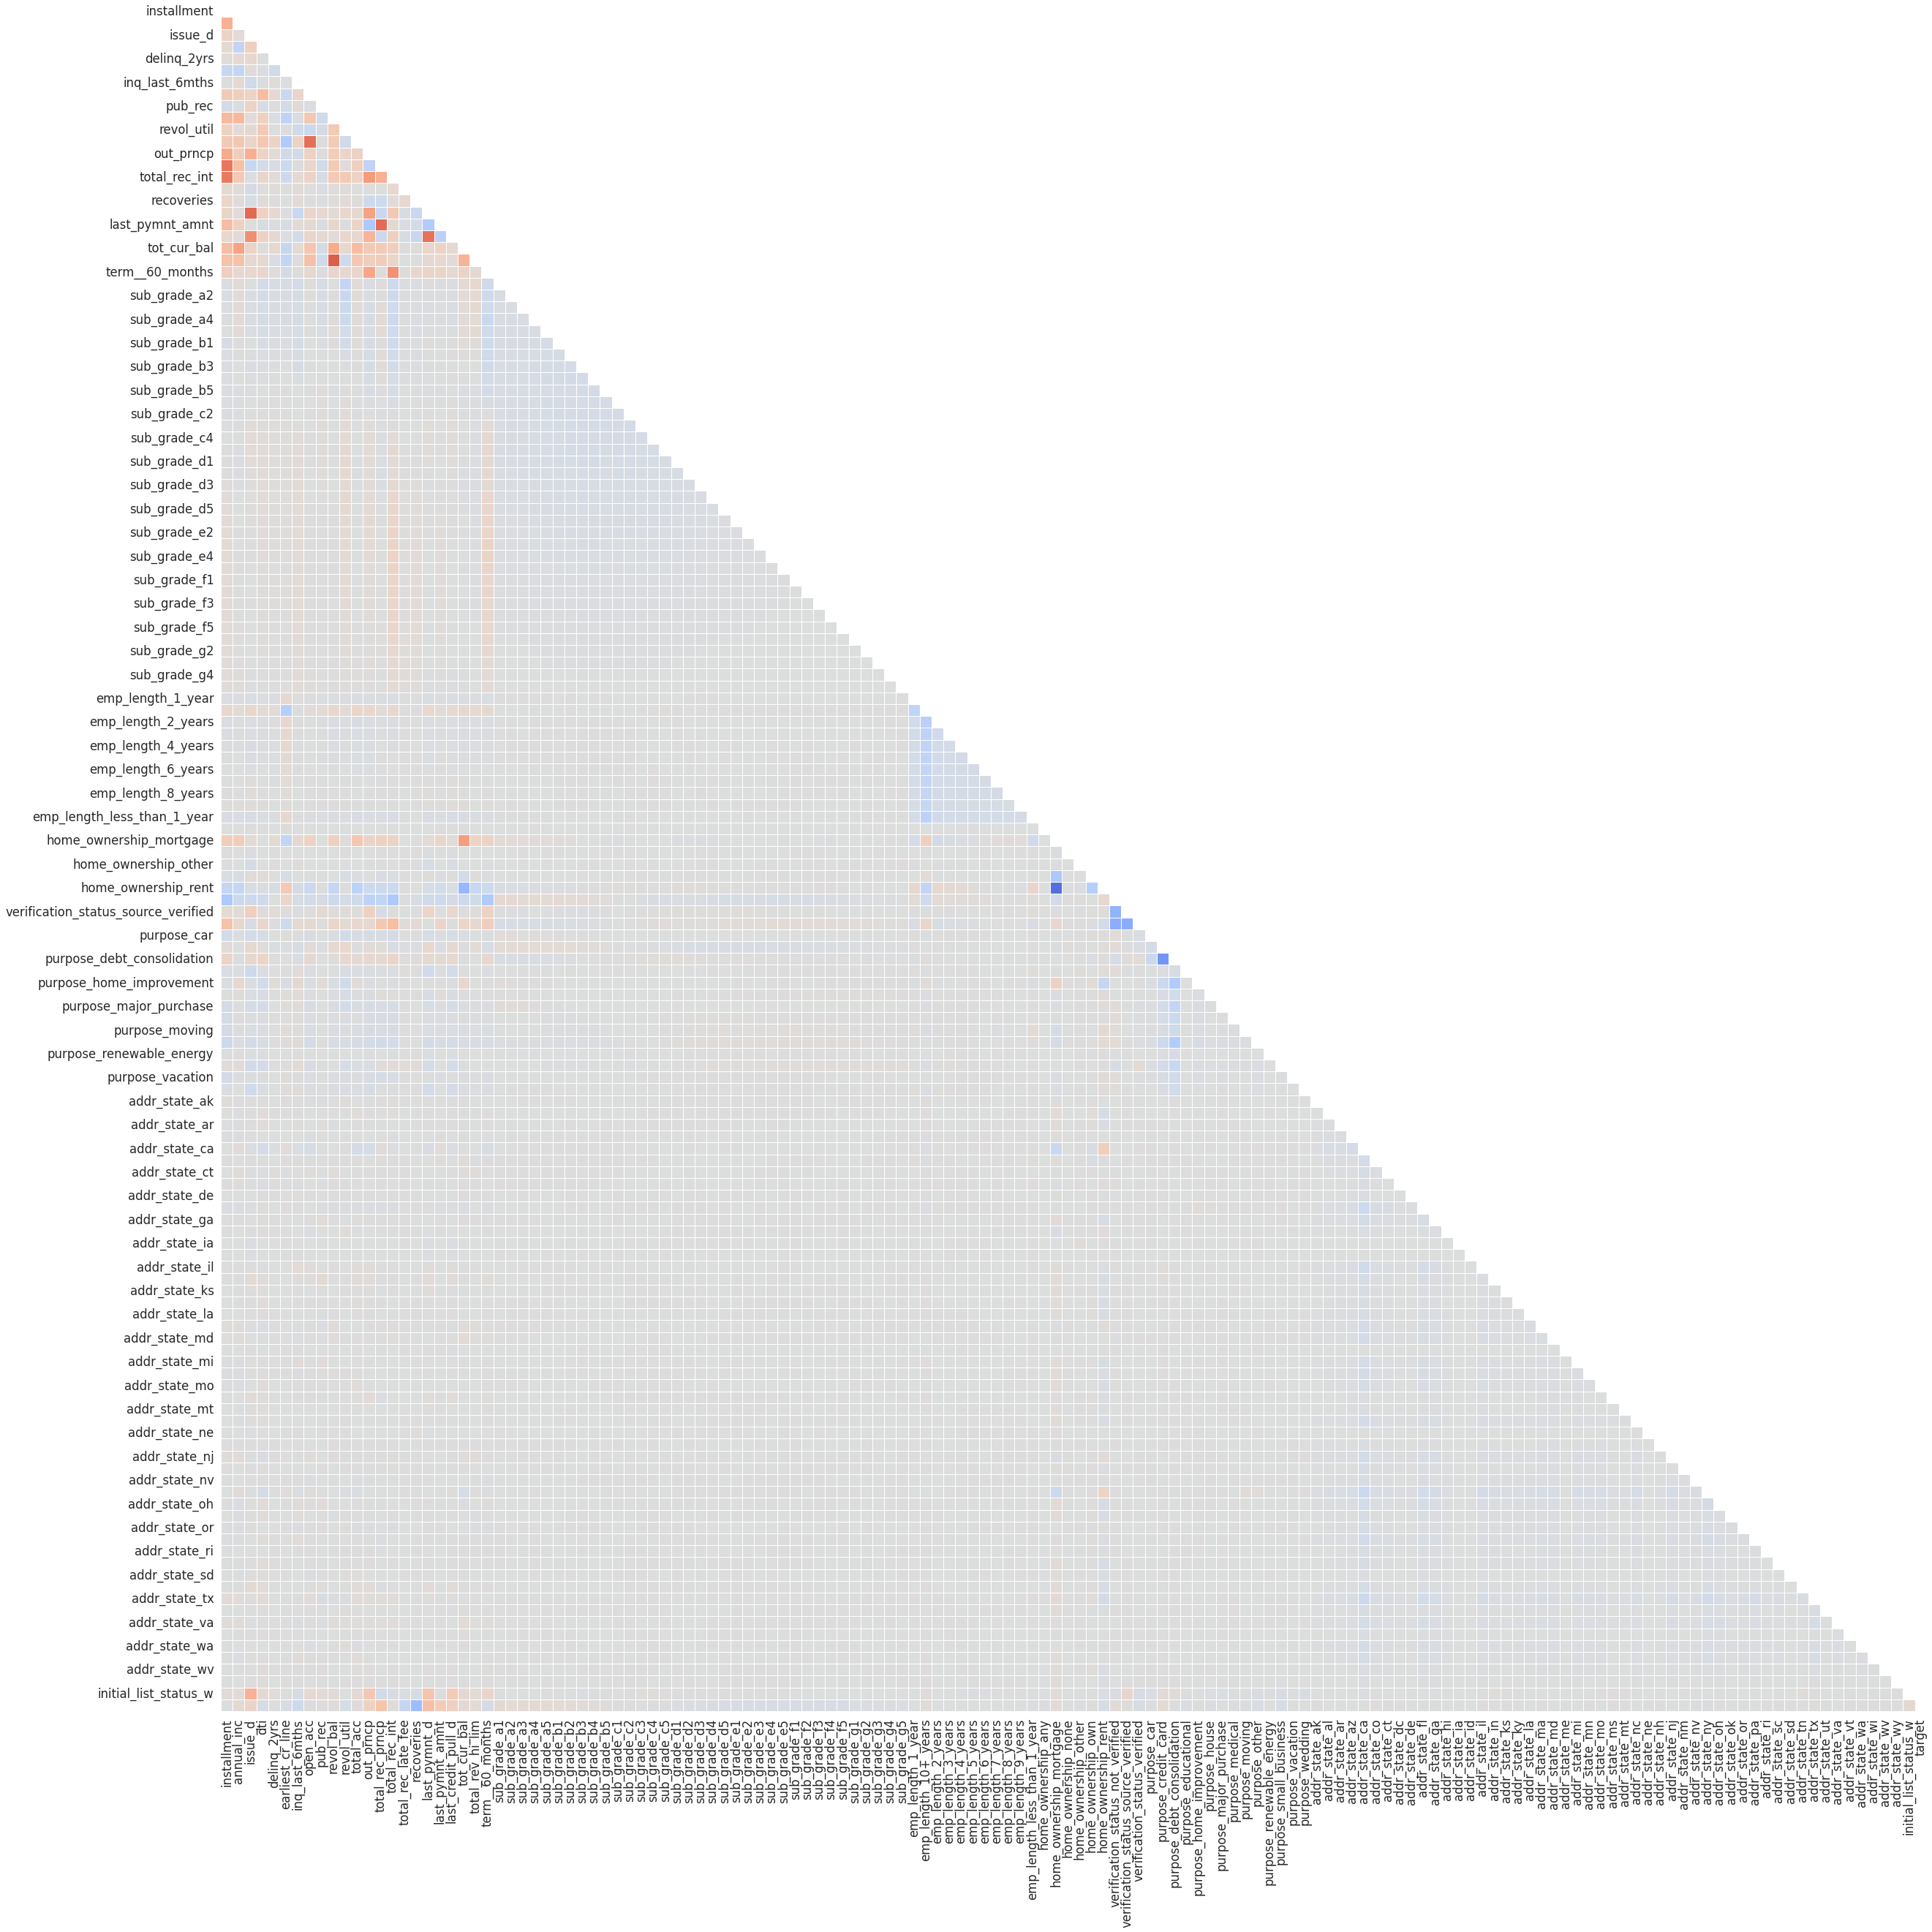

In [77]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask, fmt='.2f',
            square=True, ax=ax)

plt.show()

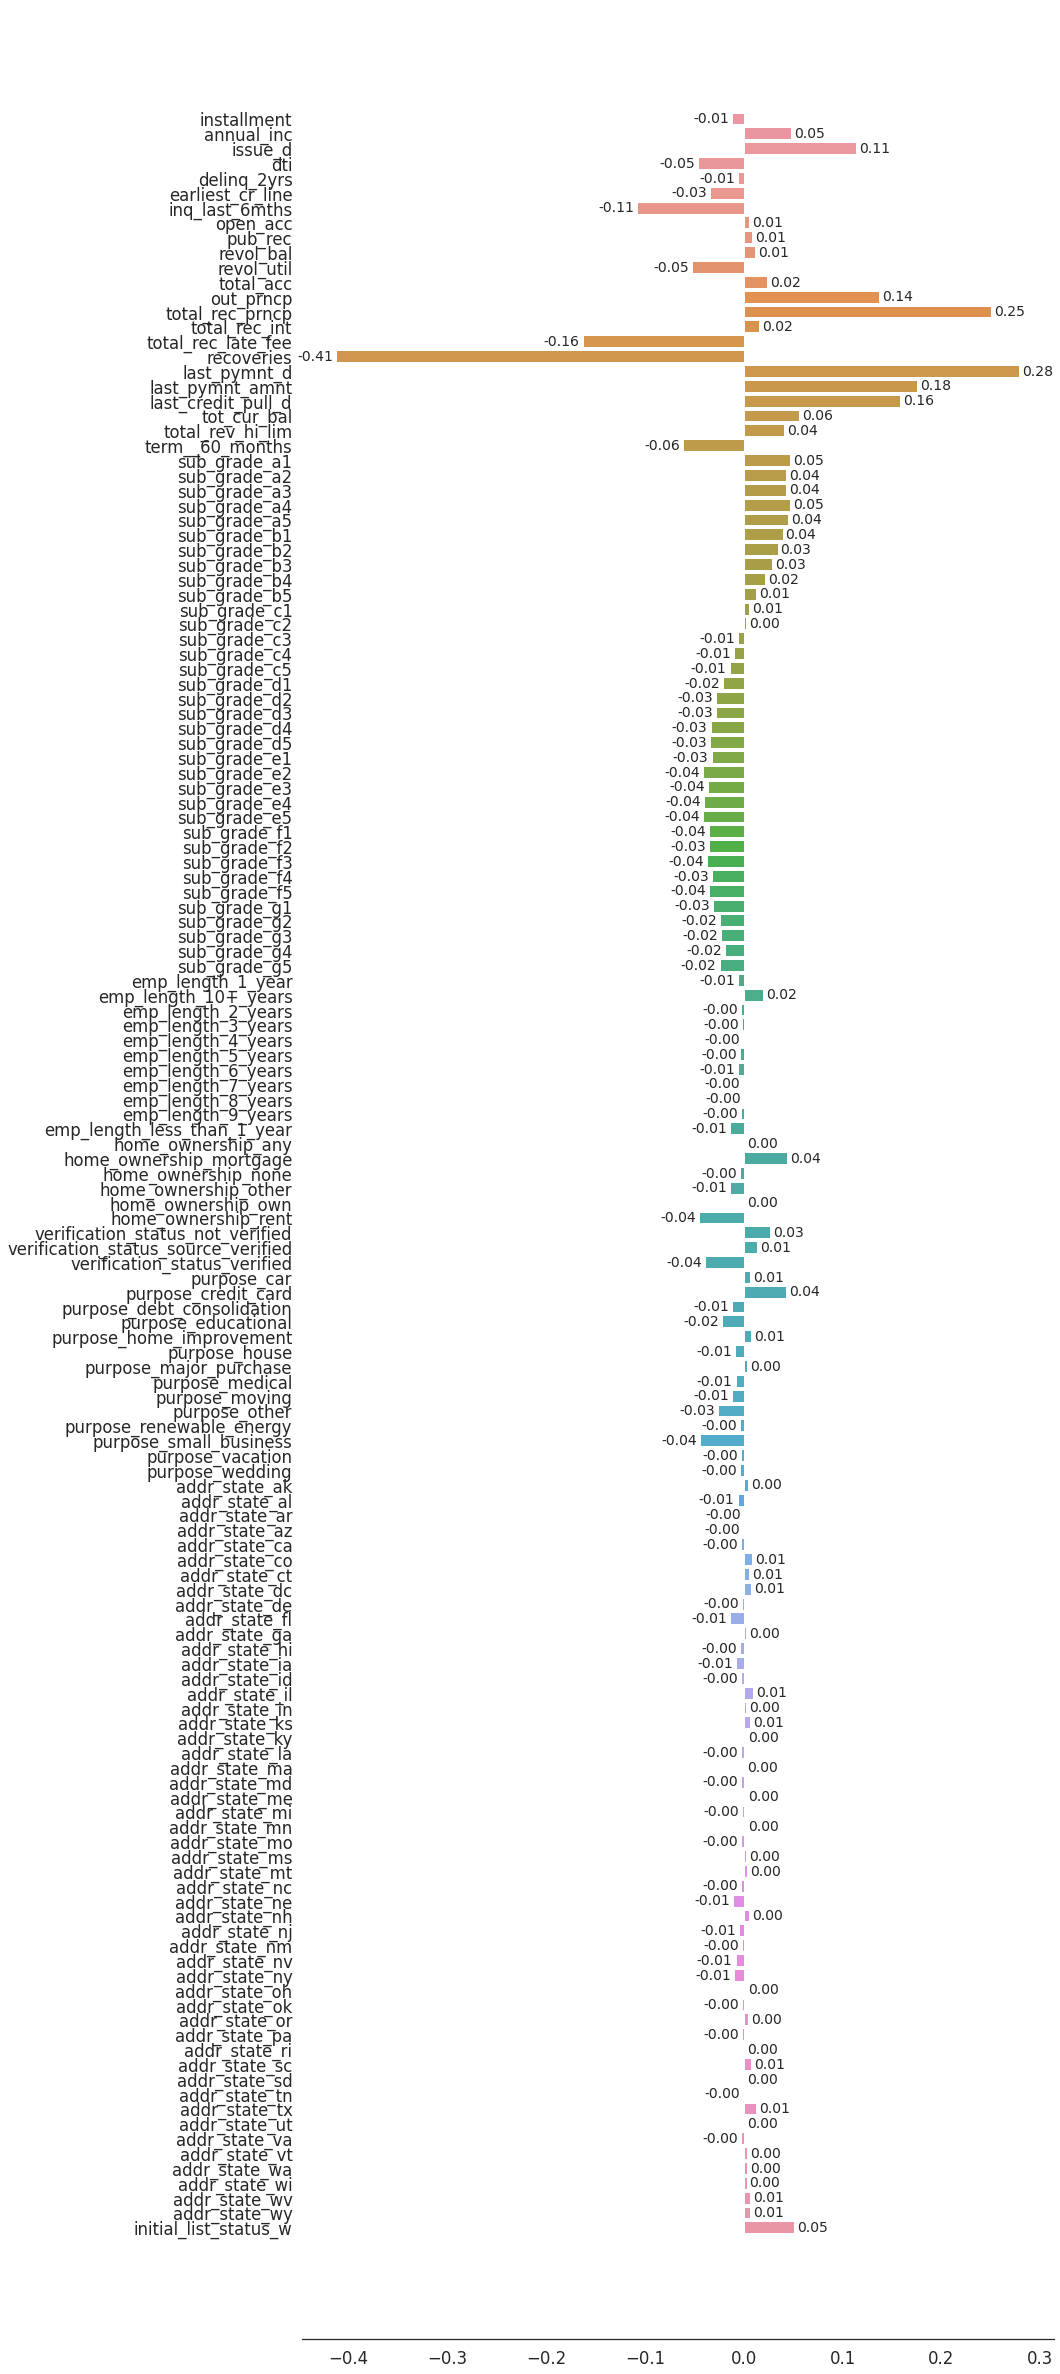

In [78]:
corr_target = corr_matrix['target'].drop('target')

fig, ax = plt.subplots(figsize=(12,40))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.axis('tight')
sns.despine(left=True)
plt.show()

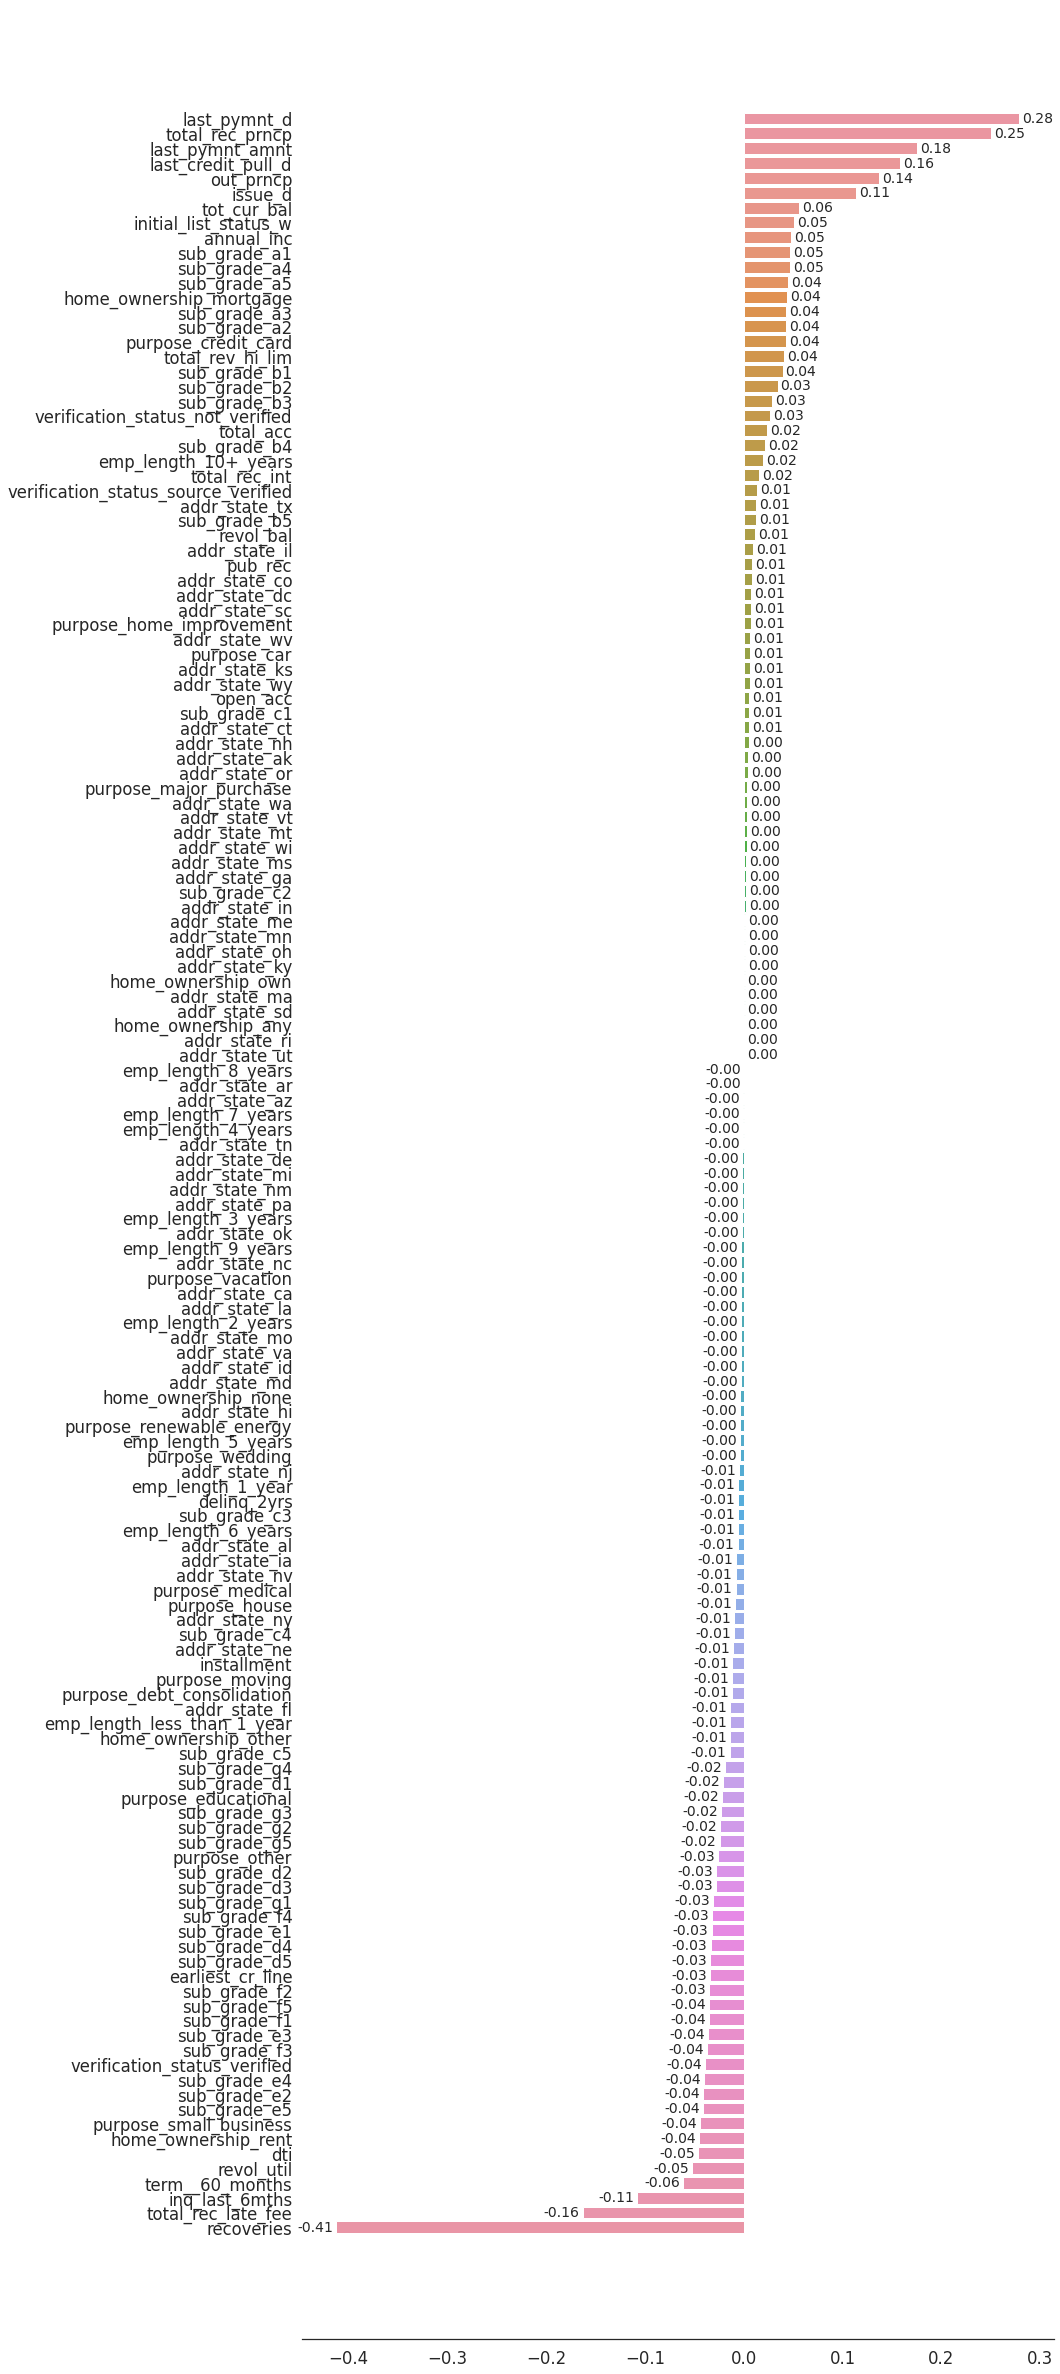

In [79]:
corr_target = corr_matrix['target'].drop('target').sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,40))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.axis('tight')
sns.despine(left=True)
plt.show()

## Oversampling with SMOTE

This dataset is imbalanced. So, my approach to get it balanced is to use SMOTE, one of the oversampling methods.
<br><br>
Note: Oversampling should only be performed on the train set.

In [80]:
smote = SMOTE(random_state=1)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scale, y_train_encode)

X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['target'])

data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

In [81]:
data_scale_train['target'].value_counts()

1    286275
0     40124
Name: target, dtype: int64

In [82]:
data_smote['target'].value_counts()

1    286275
0    286275
Name: target, dtype: int64

Now, both bad (0) and good (1) loan status categories have the same number.

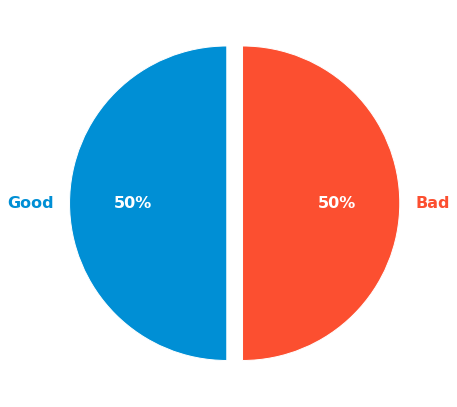

In [83]:
pie_data = data_smote['target'].value_counts(normalize=True).values * 100
pie_label = data_smote['target'].value_counts(normalize=True).index.to_list()
pie_label = ['Good' if x==1 else 'Bad' for x in pie_label]

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()

plt.show()

# Model Development (Without Feature Selection)

My computer resource is limited, so I use Google Colab to make this project. However, when I use Google Colab I always run out of resources too (crashing and restarting its runtime). Therefore, I will limit my project to using only 3 ML algorithms: Catboost, XGBoost, and LightGBM. Maybe I have to do the EDA, data preparation, and modeling in separate notebooks to save the resources.

## Default Parameter

### Parameter List

For now, I will use the default parameter

In [84]:
model_list = {
    'CatBoost':CatBoostClassifier(random_state=1, verbose=False),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

In [85]:
# without feature selection
# model = LogisticRegression(max_iter=1000, random_state=1)

# model.fit(X_train_model, y_train_model)
# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))

#               precision    recall  f1-score   support

#            0      0.659     0.867     0.749     17196
#            1      0.980     0.937     0.958    122690

#     accuracy                          0.928    139886
#    macro avg      0.820     0.902     0.853    139886
# weighted avg      0.941     0.928     0.933    139886

### CatBoost

In [86]:
# model = model_list['CatBoost']

# model.fit(X_train_model, y_train_model)
# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.975     0.821     0.891     17196
           1      0.975     0.997     0.986    122690

    accuracy                          0.975    139886
   macro avg      0.975     0.909     0.939    139886
weighted avg      0.975     0.975     0.974    139886

```



### XGBoost

In [87]:
# model = model_list['XGBoost']

# model.fit(X_train_model, y_train_model)
# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.738     0.863     0.796     17196
           1      0.980     0.957     0.969    122690

    accuracy                          0.946    139886
   macro avg      0.859     0.910     0.882    139886
weighted avg      0.951     0.946     0.947    139886

```



### LightGBM

In [88]:
# model = model_list['LightGBM']

# model.fit(X_train_model, y_train_model)
# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.980     0.800     0.881     17196
           1      0.973     0.998     0.985    122690

    accuracy                          0.973    139886
   macro avg      0.976     0.899     0.933    139886
weighted avg      0.974     0.973     0.972    139886

```



## Hyperparameter Tuning

I will use Optuna for hyperparameter tuning. However, I will only tune for the XGBoost and LightGBM. Again, that's because the limited resources, like this:


```
CatBoost is using more CPU RAM (10.5GiB) than the limit (3GiB)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(139888) > ResourceQuota(0)
```

But, I will keep the code (commented)


In [89]:
X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

### CatBoost

#### Tuning with Optuna

In [90]:
# def objective(trial):
#   param = {
#       "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
#       "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
#       "depth": trial.suggest_int("depth", 1, 12),
#       "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
#       "bootstrap_type": trial.suggest_categorical(
#           "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
#       ),
#       "used_ram_limit": "3gb",
#   }

#   if param["bootstrap_type"] == "Bayesian":
#       param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
#   elif param["bootstrap_type"] == "Bernoulli":
#       param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

#   gbm = cb.CatBoostClassifier(**param)

#   gbm.fit(X_train_model, y_train_model, eval_set=[(X_test_model, y_test_model)], verbose=0, early_stopping_rounds=100)

#   preds = gbm.predict(X_test_model)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   # accuracy = accuracy_score(y_test_model, pred_labels)
#   # return accuracy

#   objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   return objective_value

In [91]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: {}".format(len(study.trials)))

# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))

# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))

#### Model with Best Params

In [92]:
# model = CatBoostClassifier(random_state=1)
# model.set_params(**trial.params)

In [93]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))

### XGBoost

#### Tuning with Optuna

In [94]:
def objective(trial):
  dtrain = xgb.DMatrix(X_train_model, label=y_train_model)
  dvalid = xgb.DMatrix(X_test_model, label=y_test_model)

  param = {
    "verbosity": 0,
    "objective": "binary:logistic",
    # use exact for small dataset.
    "tree_method": "exact",
    # defines booster, gblinear for linear functions.
    "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
    # L2 regularization weight.
    "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
    # L1 regularization weight.
    "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
    # sampling ratio for training data.
    "subsample": trial.suggest_float("subsample", 0.2, 1.0),
    # sampling according to each tree.
    "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
  }

  if param["booster"] in ["gbtree", "dart"]:
    # maximum depth of the tree, signifies complexity of the tree.
    param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
    # minimum child weight, larger the term more conservative the tree.
    param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
    param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
    # defines how selective algorithm is.
    param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
    param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

  if param["booster"] == "dart":
    param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
    param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
    param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
    param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

  bst = xgb.train(param, dtrain)
  preds = bst.predict(dvalid)
  pred_labels = np.rint(preds)

  # objective value (optimize this value)
  # accuracy = accuracy_score(y_test_model, pred_labels)
  # return accuracy
  
  objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
  return objective_value

In [95]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

[I 2022-05-16 13:05:05,900] A new study created in memory with name: no-name-0d4ab1b0-01c3-4978-a645-bda6fe6b0b51
[I 2022-05-16 13:05:20,154] Trial 0 finished with value: 0.714807502467917 and parameters: {'booster': 'gblinear', 'lambda': 0.011168021110461912, 'alpha': 6.129765485656058e-06, 'subsample': 0.9738621107178067, 'colsample_bytree': 0.2953175414632429}. Best is trial 0 with value: 0.714807502467917.
[I 2022-05-16 13:05:34,391] Trial 1 finished with value: 0.7216346034195268 and parameters: {'booster': 'gblinear', 'lambda': 0.0061086959548119655, 'alpha': 2.0278533980069345e-06, 'subsample': 0.5664860107374048, 'colsample_bytree': 0.8997369988471224}. Best is trial 1 with value: 0.7216346034195268.
[I 2022-05-16 13:06:44,780] Trial 2 finished with value: 0.638377681397257 and parameters: {'booster': 'gbtree', 'lambda': 0.011525291234434916, 'alpha': 0.04824875925232588, 'subsample': 0.5366603790066651, 'colsample_bytree': 0.9603752525168239, 'max_depth': 7, 'min_child_weight'

Number of finished trials:  15
Best trial:
  Value: 0.8753047065441592
  Params: 
    booster: gbtree
    lambda: 1.0171366151761172e-08
    alpha: 0.0066868652003572926
    subsample: 0.7197017844271527
    colsample_bytree: 0.5208533719447795
    max_depth: 9
    min_child_weight: 9
    eta: 0.8323630448940508
    gamma: 0.5360715441717996
    grow_policy: lossguide


#### Model with Best Params

In [96]:
model = XGBClassifier(random_state=1)
model.set_params(**trial.params)

XGBClassifier(alpha=0.0066868652003572926, colsample_bytree=0.5208533719447795,
              eta=0.8323630448940508, gamma=0.5360715441717996,
              grow_policy='lossguide', lambda=1.0171366151761172e-08,
              max_depth=9, min_child_weight=9, random_state=1,
              subsample=0.7197017844271527)

In [97]:
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.972     0.811     0.884     17196
           1      0.974     0.997     0.985    122690

    accuracy                          0.974    139886
   macro avg      0.973     0.904     0.935    139886
weighted avg      0.974     0.974     0.973    139886



#### Fit on F1 Score (Negative Class)



```
XGBClassifier(alpha=0.0066868652003572926, colsample_bytree=0.5208533719447795,
              eta=0.8323630448940508, gamma=0.5360715441717996,
              grow_policy='lossguide', lambda=1.0171366151761172e-08,
              max_depth=9, min_child_weight=9, random_state=1,
              subsample=0.7197017844271527)
```





```
              precision    recall  f1-score   support

           0      0.972     0.811     0.884     17196
           1      0.974     0.997     0.985    122690

    accuracy                          0.974    139886
   macro avg      0.973     0.904     0.935    139886
weighted avg      0.974     0.974     0.973    139886

```



#### Fit on Accuracy



```
XGBClassifier(alpha=3.1657303882378788e-06, colsample_bytree=0.4908503060548186,
              eta=1.1903181915882054e-06, gamma=0.013472445824643506,
              grow_policy='depthwise', lambda=0.10202138717169698, max_depth=9,
              min_child_weight=7, random_state=1, subsample=0.2847588235012893)
```





```
              precision    recall  f1-score   support

           0      0.970     0.808     0.882     17196
           1      0.974     0.997     0.985    122690

    accuracy                          0.973    139886
   macro avg      0.972     0.902     0.933    139886
weighted avg      0.973     0.973     0.972    139886

```



### LightGBM

#### Tuning with Optuna

In [98]:
def objective(trial):
  dtrain = lgbm.Dataset(X_train_model, label=y_train_model)

  param = {
    "objective": "binary",
    "metric": "binary_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
    "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
    "num_leaves": trial.suggest_int("num_leaves", 2, 256),
    "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
    "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
    "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
    "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
  }

  gbm = lgbm.train(param, dtrain)
  preds = gbm.predict(X_test_model)
  pred_labels = np.rint(preds)

  # objective value (optimize this value)
  # accuracy = accuracy_score(y_test_model, pred_labels)
  # return accuracy

  objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
  return objective_value

In [99]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

[I 2022-05-16 13:23:49,045] A new study created in memory with name: no-name-9ccf3747-2ec6-4c94-bd4f-14047aeb738b
[I 2022-05-16 13:24:32,321] Trial 0 finished with value: 0.8903229888330012 and parameters: {'lambda_l1': 8.594014927322544e-07, 'lambda_l2': 2.0831443679622147e-07, 'num_leaves': 156, 'feature_fraction': 0.5191461374402497, 'bagging_fraction': 0.7996636989597943, 'bagging_freq': 5, 'min_child_samples': 94}. Best is trial 0 with value: 0.8903229888330012.
[I 2022-05-16 13:25:04,933] Trial 1 finished with value: 0.8858296505897688 and parameters: {'lambda_l1': 0.0004110168945064669, 'lambda_l2': 3.320941050329347e-06, 'num_leaves': 108, 'feature_fraction': 0.44069408977343466, 'bagging_fraction': 0.4948447755029712, 'bagging_freq': 6, 'min_child_samples': 44}. Best is trial 0 with value: 0.8903229888330012.
[I 2022-05-16 13:25:45,474] Trial 2 finished with value: 0.8751766670949505 and parameters: {'lambda_l1': 2.5062433081243483, 'lambda_l2': 5.902880965437041e-08, 'num_lea

Number of finished trials:  13
Best trial:
  Value: 0.8930531894756766
  Params: 
    lambda_l1: 0.04709297089846277
    lambda_l2: 0.0010857116981773474
    num_leaves: 222
    feature_fraction: 0.7395858083411629
    bagging_fraction: 0.9936988477151267
    bagging_freq: 7
    min_child_samples: 37


#### Model with Best Params

In [100]:
model = LGBMClassifier(random_state=1)
model.set_params(**trial.params)

LGBMClassifier(bagging_fraction=0.9936988477151267, bagging_freq=7,
               feature_fraction=0.7395858083411629,
               lambda_l1=0.04709297089846277, lambda_l2=0.0010857116981773474,
               min_child_samples=37, num_leaves=222, random_state=1)

In [101]:
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.973     0.821     0.891     17196
           1      0.975     0.997     0.986    122690

    accuracy                          0.975    139886
   macro avg      0.974     0.909     0.938    139886
weighted avg      0.975     0.975     0.974    139886



#### Fit on F1 Score (Negative Class)



```
LGBMClassifier(bagging_fraction=0.9936988477151267, bagging_freq=7,
               feature_fraction=0.7395858083411629,
               lambda_l1=0.04709297089846277, lambda_l2=0.0010857116981773474,
               min_child_samples=37, num_leaves=222, random_state=1)
```





```
              precision    recall  f1-score   support

           0      0.973     0.821     0.891     17196
           1      0.975     0.997     0.986    122690

    accuracy                          0.975    139886
   macro avg      0.974     0.909     0.938    139886
weighted avg      0.975     0.975     0.974    139886

```



#### Fit on Accuracy



```
LGBMClassifier(bagging_fraction=0.9430813312385363, bagging_freq=3,
               feature_fraction=0.8751806102515858,
               lambda_l1=0.16350883932821095, lambda_l2=0.0001508116676260232,
               min_child_samples=52, num_leaves=159, random_state=1)
```





```
              precision    recall  f1-score   support

           0      0.976     0.821     0.892     17196
           1      0.975     0.997     0.986    122690

    accuracy                          0.976    139886
   macro avg      0.976     0.909     0.939    139886
weighted avg      0.976     0.976     0.975    139886

```



# Model Development (With Feature Selection)

## Feature Selection

### Univariate Filter

I will use ANOVA to do feature selection.

In [102]:
threshold = 55

filter = SelectKBest(score_func=f_classif, k=threshold)
filter.fit(X_train_scale, y_train_encode)

X_train_filter = filter.transform(X_train_scale)
X_test_filter = filter.transform(X_test_scale)

print('before filter\t:', X_train_scale.shape)
print('after filter\t:', X_train_filter.shape)

before filter	: (326399, 143)
after filter	: (326399, 55)


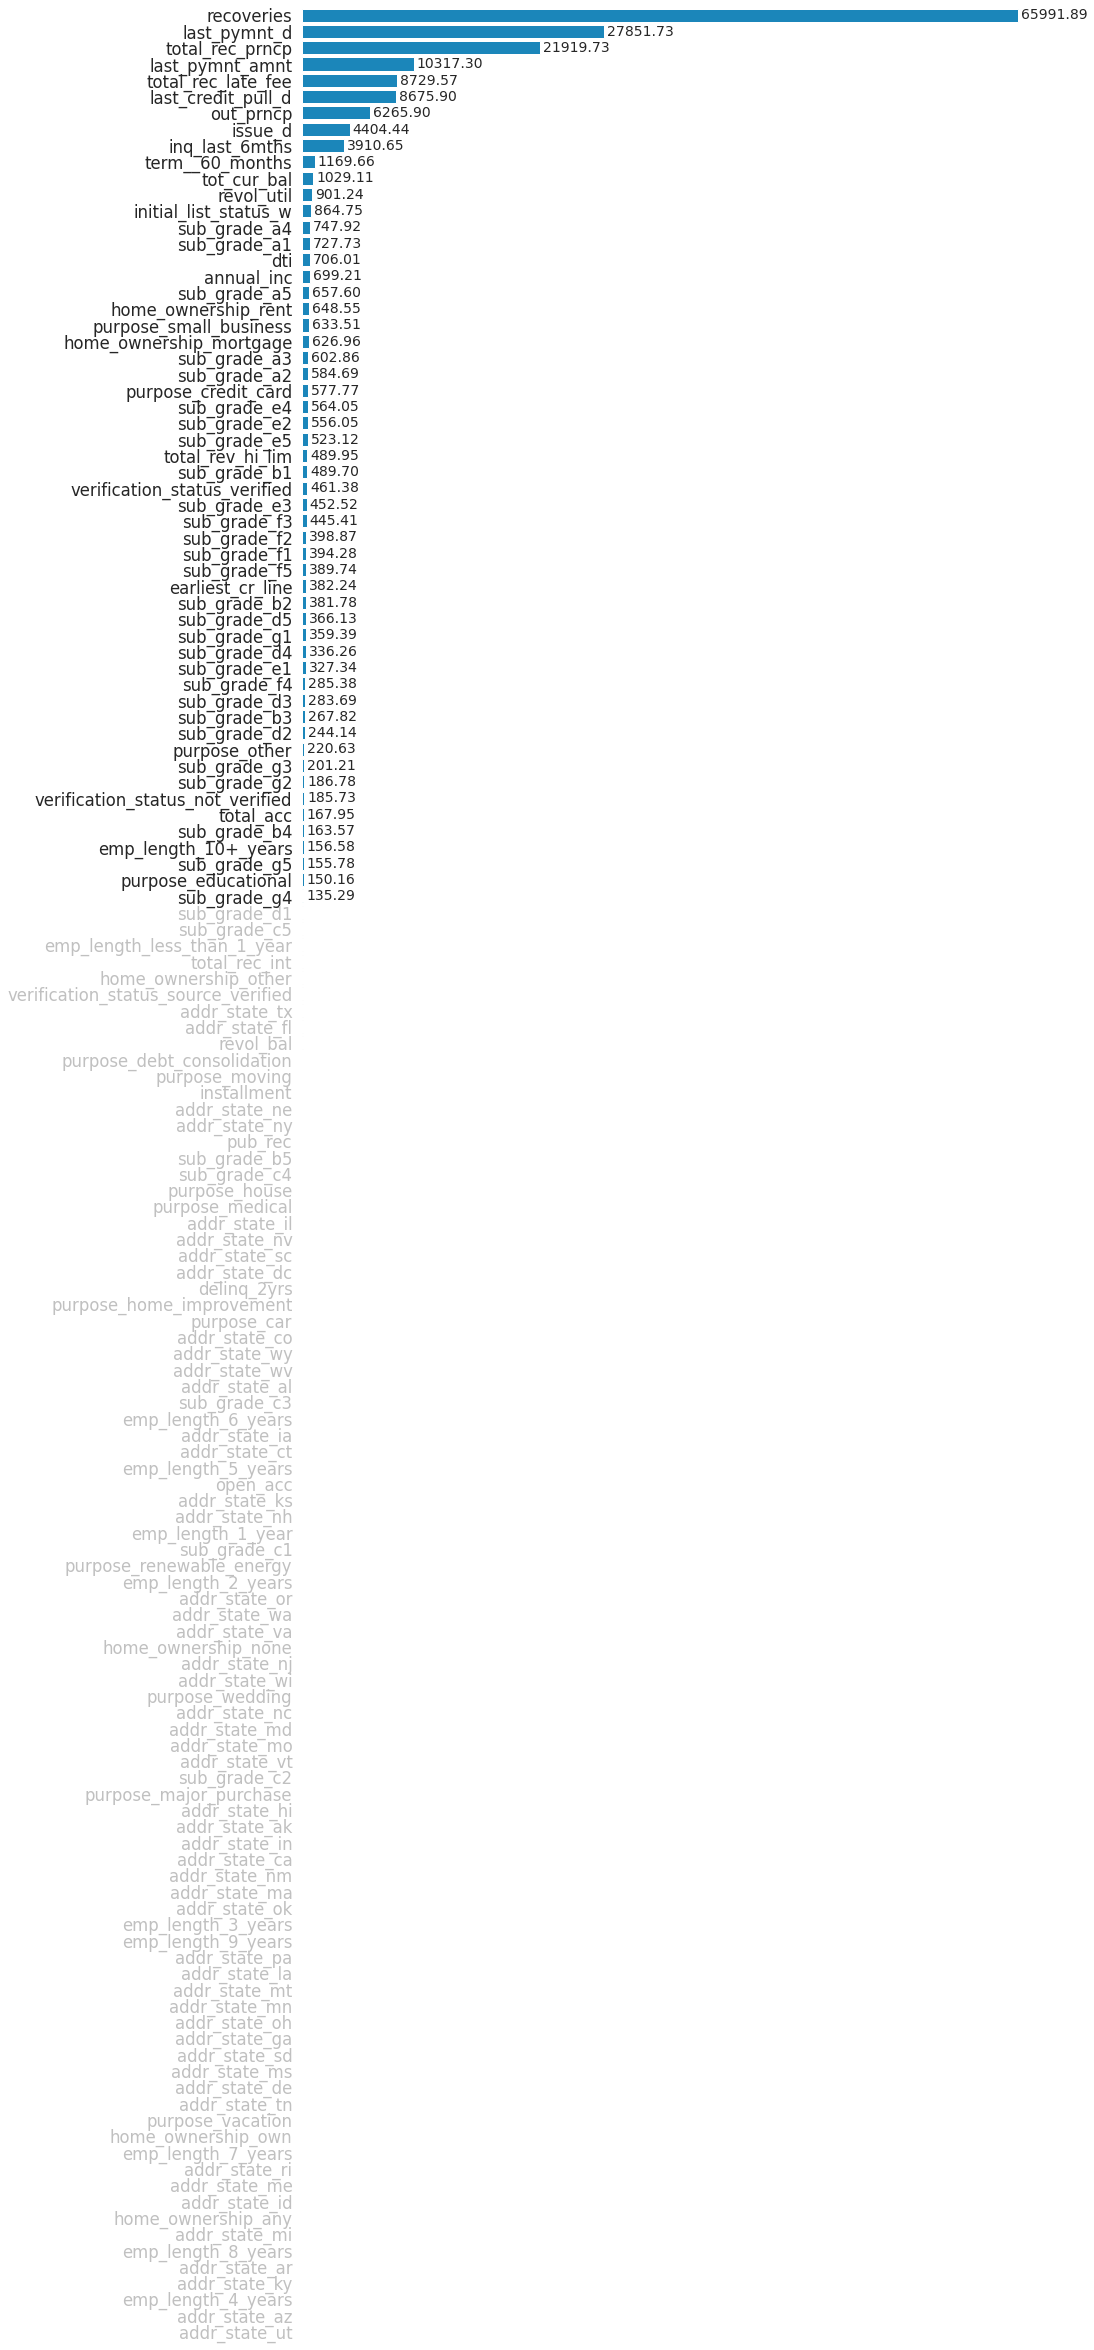

In [103]:
# viz
selected_feature = filter.get_feature_names_out()
feature_name = filter.feature_names_in_
feature_score = filter.scores_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_score':feature_score}).sort_values('feature_score', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
selected = list()
for i in range(0, X_train_scale.shape[1]):
  if i < threshold:
    selected.append(True)
  else:
    selected.append(False)

selected_s = pd.Series(selected, name='selected')
feature_selection = pd.concat([feature_selection, selected_s], axis=1)

# highlight the top features
palette = []
for i in range(0, len(feature_selection)):
  if i < threshold:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,40))

sns.barplot(data=feature_selection, x='feature_score', y='feature_name', ax=ax, palette=palette)
# ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

# custom bar label visibility
for con in ax.containers:
  # labels = [val for val in con.datavalues]
  labels = con.datavalues
  labels_len = len(labels)

  # masking the top features
  np.put(labels, np.arange(threshold,labels_len), [-1])

  # hide the labels for non-top features
  labels = [f'{val:.2f}' if val != -1 else '' for val in labels]

  ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(left=True, bottom=True)

plt.show()

In [104]:
mask = feature_selection['feature_score'] > 500

feature_selection[mask]

feature_name  feature_score  selected
0                recoveries      65991.888      True
1              last_pymnt_d      27851.732      True
2           total_rec_prncp      21919.733      True
3           last_pymnt_amnt      10317.296      True
4        total_rec_late_fee       8729.569      True
5        last_credit_pull_d       8675.899      True
6                 out_prncp       6265.904      True
7                   issue_d       4404.436      True
8            inq_last_6mths       3910.654      True
9           term__60_months       1169.658      True
10              tot_cur_bal       1029.107      True
11               revol_util        901.236      True
12    initial_list_status_w        864.746      True
13             sub_grade_a4        747.923      True
14             sub_grade_a1        727.735      True
15                      dti        706.012      True
16               annual_inc        699.206      True
17             sub_grade_a5        657.597      True
18      home_ownership_rent        648.549      True
19   purpose_small_business        633.511      True
20  home_ownership_mortgage        626.960      True
21             sub_grade_a3        602.860      True
22             sub_grade_a2        584.688      True
23      purpose_credit_card        577.774      True
24             sub_grade_e4        564.047      True
25             sub_grade_e2        556.052      True
26             sub_grade_e5        523.119      True

### Oversampling with SMOTE

Based on the SMOTE paper, we have to do feature selection first, then do the oversampling. So, I will re-SMOTE again after doing the feature selection.

In [105]:
smote = SMOTE(random_state=1)

X_train_smote_filter, y_train_smote_filter = smote.fit_resample(X_train_filter, y_train_encode)

X_train_smote_filter_df = pd.DataFrame(X_train_smote_filter, columns=selected_feature)
y_train_smote_filter_df = pd.DataFrame(y_train_smote_filter, columns=['target'])

data_smote = pd.concat([X_train_smote_filter_df, y_train_smote_filter_df], axis=1)

## Default Parameter

### Parameter List

For now, I will use the default parameter

In [106]:
model_list = {
    'CatBoost':CatBoostClassifier(random_state=1, verbose=False),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

X_train_model = X_train_smote_filter.copy()
y_train_model = y_train_smote_filter.copy()

X_test_model = X_test_filter.copy()
y_test_model = y_test_encode.copy()

### CatBoost

In [107]:
# model = model_list['CatBoost']

# model.fit(X_train_model, y_train_model)
# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.958     0.811     0.878     17196
           1      0.974     0.995     0.984    122690

    accuracy                          0.972    139886
   macro avg      0.966     0.903     0.931    139886
weighted avg      0.972     0.972     0.971    139886

```



### XGBoost

In [108]:
# model = model_list['XGBoost']

# model.fit(X_train_model, y_train_model)
# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.604     0.891     0.720     17196
           1      0.984     0.918     0.950    122690

    accuracy                          0.915    139886
   macro avg      0.794     0.905     0.835    139886
weighted avg      0.937     0.915     0.922    139886

```



### LightGBM

In [109]:
# model = model_list['LightGBM']

# model.fit(X_train_model, y_train_model)
# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.938     0.788     0.857     17196
           1      0.971     0.993     0.982    122690

    accuracy                          0.968    139886
   macro avg      0.954     0.890     0.919    139886
weighted avg      0.967     0.968     0.966    139886

```



## Hyperparameter Tuning

I will use Optuna for hyperparameter tuning. However, I will only tune for the XGBoost and LightGBM. Again, that's because the limited resources, like this:


```
CatBoost is using more CPU RAM (10.5GiB) than the limit (3GiB)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(139888) > ResourceQuota(0)
```



But, I will keep the code (commented)

In [110]:
X_train_model = X_train_smote_filter.copy()
y_train_model = y_train_smote_filter.copy()

X_test_model = X_test_filter.copy()
y_test_model = y_test_encode.copy()

### CatBoost

#### Tuning with Optuna

In [111]:
# def objective(trial):
#   param = {
#       "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
#       "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
#       "depth": trial.suggest_int("depth", 1, 12),
#       "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
#       "bootstrap_type": trial.suggest_categorical(
#           "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
#       ),
#       "used_ram_limit": "3gb",
#   }

#   if param["bootstrap_type"] == "Bayesian":
#       param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
#   elif param["bootstrap_type"] == "Bernoulli":
#       param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

#   gbm = cb.CatBoostClassifier(**param)

#   gbm.fit(X_train_model, y_train_model, eval_set=[(X_test_model, y_test_model)], verbose=0, early_stopping_rounds=100)

#   preds = gbm.predict(X_test_model)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   # accuracy = accuracy_score(y_test_model, pred_labels)
#   # return accuracy

#   objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   return objective_value

In [112]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: {}".format(len(study.trials)))

# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))

# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))

#### Model with Best Params

In [113]:
# model = CatBoostClassifier(random_state=1)
# model.set_params(**trial.params)

In [114]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))

### XGBoost

#### Tuning with Optuna

In [115]:
def objective(trial):
  dtrain = xgb.DMatrix(X_train_model, label=y_train_model)
  dvalid = xgb.DMatrix(X_test_model, label=y_test_model)

  param = {
    "verbosity": 0,
    "objective": "binary:logistic",
    # use exact for small dataset.
    "tree_method": "exact",
    # defines booster, gblinear for linear functions.
    "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
    # L2 regularization weight.
    "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
    # L1 regularization weight.
    "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
    # sampling ratio for training data.
    "subsample": trial.suggest_float("subsample", 0.2, 1.0),
    # sampling according to each tree.
    "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
  }

  if param["booster"] in ["gbtree", "dart"]:
    # maximum depth of the tree, signifies complexity of the tree.
    param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
    # minimum child weight, larger the term more conservative the tree.
    param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
    param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
    # defines how selective algorithm is.
    param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
    param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

  if param["booster"] == "dart":
    param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
    param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
    param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
    param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

  bst = xgb.train(param, dtrain)
  preds = bst.predict(dvalid)
  pred_labels = np.rint(preds)

  # objective value (optimize this value)
  # accuracy = accuracy_score(y_test_model, pred_labels)
  # return accuracy

  objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
  return objective_value

In [116]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

[I 2022-05-16 13:35:51,259] A new study created in memory with name: no-name-ccacad2b-cbcb-42c4-a734-83d1d02fbebf
[I 2022-05-16 13:36:07,406] Trial 0 finished with value: 0.7475324955504019 and parameters: {'booster': 'gbtree', 'lambda': 0.017033992163053815, 'alpha': 1.0661573988115561e-06, 'subsample': 0.9613062644656349, 'colsample_bytree': 0.3526963929847988, 'max_depth': 7, 'min_child_weight': 5, 'eta': 0.009176911104520777, 'gamma': 0.0003960266053279952, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.7475324955504019.
[I 2022-05-16 13:36:12,333] Trial 1 finished with value: 0.21894297246024372 and parameters: {'booster': 'gblinear', 'lambda': 3.1356283277058974e-06, 'alpha': 0.31447912579878967, 'subsample': 0.42461743376890865, 'colsample_bytree': 0.8822628334537412}. Best is trial 0 with value: 0.7475324955504019.
[I 2022-05-16 13:36:43,680] Trial 2 finished with value: 0.7158140172815801 and parameters: {'booster': 'gbtree', 'lambda': 1.1674482047476384e-05, 'alph

Number of finished trials:  29
Best trial:
  Value: 0.8280326651818858
  Params: 
    booster: dart
    lambda: 0.00014673764864663315
    alpha: 0.0002812638945260585
    subsample: 0.747186579641292
    colsample_bytree: 0.5720539945328615
    max_depth: 9
    min_child_weight: 2
    eta: 9.383599100175257e-07
    gamma: 0.0045240566437241714
    grow_policy: depthwise
    sample_type: weighted
    normalize_type: tree
    rate_drop: 0.0006551191015563826
    skip_drop: 1.063436594675367e-05


#### Model with Best Params

In [117]:
model = XGBClassifier(random_state=1)
model.set_params(**trial.params)

XGBClassifier(alpha=0.0002812638945260585, booster='dart',
              colsample_bytree=0.5720539945328615, eta=9.383599100175257e-07,
              gamma=0.0045240566437241714, grow_policy='depthwise',
              lambda=0.00014673764864663315, max_depth=9, min_child_weight=2,
              normalize_type='tree', random_state=1,
              rate_drop=0.0006551191015563826, sample_type='weighted',
              skip_drop=1.063436594675367e-05, subsample=0.747186579641292)

In [118]:
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.894     0.815     0.852     17196
           1      0.974     0.986     0.980    122690

    accuracy                          0.965    139886
   macro avg      0.934     0.901     0.916    139886
weighted avg      0.964     0.965     0.965    139886



#### Fit on F1 Score (Negative Class)



```
XGBClassifier(alpha=0.0002812638945260585, booster='dart',
              colsample_bytree=0.5720539945328615, eta=9.383599100175257e-07,
              gamma=0.0045240566437241714, grow_policy='depthwise',
              lambda=0.00014673764864663315, max_depth=9, min_child_weight=2,
              normalize_type='tree', random_state=1,
              rate_drop=0.0006551191015563826, sample_type='weighted',
              skip_drop=1.063436594675367e-05, subsample=0.747186579641292)
```





```
              precision    recall  f1-score   support

           0      0.894     0.815     0.852     17196
           1      0.974     0.986     0.980    122690

    accuracy                          0.965    139886
   macro avg      0.934     0.901     0.916    139886
weighted avg      0.964     0.965     0.965    139886

```



#### Fit on Accuracy



```
XGBClassifier(alpha=0.0032267126416118657, booster='dart',
              colsample_bytree=0.5166724733706263, eta=1.0165956443856115e-06,
              gamma=4.752836572844486e-08, grow_policy='depthwise',
              lambda=0.07660741546864654, max_depth=9, min_child_weight=8,
              normalize_type='forest', random_state=1,
              rate_drop=3.954308953486245e-06, sample_type='uniform',
              skip_drop=5.116655783844006e-08, subsample=0.6939389978777615)
```





```
              precision    recall  f1-score   support

           0      0.890     0.818     0.852     17196
           1      0.975     0.986     0.980    122690

    accuracy                          0.965    139886
   macro avg      0.932     0.902     0.916    139886
weighted avg      0.964     0.965     0.964    139886

```



### LightGBM

#### Tuning with Optuna

In [119]:
def objective(trial):
  dtrain = lgbm.Dataset(X_train_model, label=y_train_model)

  param = {
    "objective": "binary",
    "metric": "binary_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
    "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
    "num_leaves": trial.suggest_int("num_leaves", 2, 256),
    "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
    "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
    "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
    "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
  }

  gbm = lgbm.train(param, dtrain)
  preds = gbm.predict(X_test_model)
  pred_labels = np.rint(preds)

  # objective value (optimize this value)
  # accuracy = accuracy_score(y_test_model, pred_labels)
  # return accuracy

  objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
  return objective_value

In [120]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

[I 2022-05-16 13:54:38,838] A new study created in memory with name: no-name-d6185800-a16f-4417-a159-79ea76cd5aa6
[I 2022-05-16 13:55:07,901] Trial 0 finished with value: 0.8690951378194047 and parameters: {'lambda_l1': 3.014798510571688e-07, 'lambda_l2': 0.27987646626108936, 'num_leaves': 202, 'feature_fraction': 0.9632701365208466, 'bagging_fraction': 0.4625994639958889, 'bagging_freq': 3, 'min_child_samples': 82}. Best is trial 0 with value: 0.8690951378194047.
[I 2022-05-16 13:55:33,447] Trial 1 finished with value: 0.8694744830202997 and parameters: {'lambda_l1': 5.861559743492377e-07, 'lambda_l2': 1.8001828933506223e-05, 'num_leaves': 88, 'feature_fraction': 0.870272703522127, 'bagging_fraction': 0.6268678968888491, 'bagging_freq': 5, 'min_child_samples': 82}. Best is trial 1 with value: 0.8694744830202997.
[I 2022-05-16 13:56:08,779] Trial 2 finished with value: 0.8732492332985551 and parameters: {'lambda_l1': 3.816251127610734e-06, 'lambda_l2': 6.111913902586293e-07, 'num_leave

Number of finished trials:  21
Best trial:
  Value: 0.8751379125555591
  Params: 
    lambda_l1: 0.03347882477209126
    lambda_l2: 0.006094356311757522
    num_leaves: 244
    feature_fraction: 0.8047221215525308
    bagging_fraction: 0.9298445068816157
    bagging_freq: 6
    min_child_samples: 17


#### Model with Best Params

In [121]:
model = LGBMClassifier(random_state=1)
model.set_params(**trial.params)

LGBMClassifier(bagging_fraction=0.9298445068816157, bagging_freq=6,
               feature_fraction=0.8047221215525308,
               lambda_l1=0.03347882477209126, lambda_l2=0.006094356311757522,
               min_child_samples=17, num_leaves=244, random_state=1)

In [122]:
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.956     0.807     0.875     17196
           1      0.973     0.995     0.984    122690

    accuracy                          0.972    139886
   macro avg      0.964     0.901     0.929    139886
weighted avg      0.971     0.972     0.971    139886



#### Fit on F1 Score (Negative Class)



```
LGBMClassifier(bagging_fraction=0.9298445068816157, bagging_freq=6,
               feature_fraction=0.8047221215525308,
               lambda_l1=0.03347882477209126, lambda_l2=0.006094356311757522,
               min_child_samples=17, num_leaves=244, random_state=1)
```





```
              precision    recall  f1-score   support

           0      0.956     0.807     0.875     17196
           1      0.973     0.995     0.984    122690

    accuracy                          0.972    139886
   macro avg      0.964     0.901     0.929    139886
weighted avg      0.971     0.972     0.971    139886

```



#### Fit on Accuracy



```
LGBMClassifier(bagging_fraction=0.9050658995184617, bagging_freq=6,
               feature_fraction=0.5638108186552019,
               lambda_l1=0.6666070790289115, lambda_l2=8.430177799350215e-05,
               min_child_samples=19, num_leaves=253, random_state=1)
```





```
              precision    recall  f1-score   support

           0      0.957     0.805     0.875     17196
           1      0.973     0.995     0.984    122690

    accuracy                          0.972    139886
   macro avg      0.965     0.900     0.929    139886
weighted avg      0.971     0.972     0.971    139886

```



# Reference and Further Reading
- LendingClub. "What do the different Note statuses mean?" ([source](https://help.lendingclub.com/hc/en-us/articles/216109367-What-do-the-different-Note-statuses-mean-))
- Corporate Finance Institute. "Variance Inflation Factor (VIF)" ([source](https://corporatefinanceinstitute.com/resources/knowledge/other/variance-inflation-factor-vif/))
- Analytics Vidhya. "What is Multicollinearity? Here’s Everything You Need to Know" ([source](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/))